MILESTONE 1 (PREPROCESS AND FEATURE ENGINEERING)

                                time   magnitude   longitude    latitude  \
count                            492  492.000000  492.000000  492.000000   
mean   2023-08-15 07:29:14.622050560    4.800772   24.556356   -0.017742   
min       2023-08-01 02:20:46.066000    4.500000 -179.931400  -62.177500   
25%    2023-08-07 00:07:31.091749888    4.500000  -75.063325  -21.994050   
50%    2023-08-15 00:00:27.827500032    4.700000   70.097650   -1.305250   
75%    2023-08-22 19:23:30.149750016    4.900000  129.117575   21.743200   
max       2023-08-31 21:43:25.888000    7.100000  179.899300   83.475200   
std                              NaN    0.375329  119.982102   29.960864   

            depth  
count  492.000000  
mean    73.788683  
min      2.963000  
25%     10.000000  
50%     25.064500  
75%     71.293500  
max    646.537000  
std    125.042290  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 6 columns):
 #   Column     Non-Null Count 

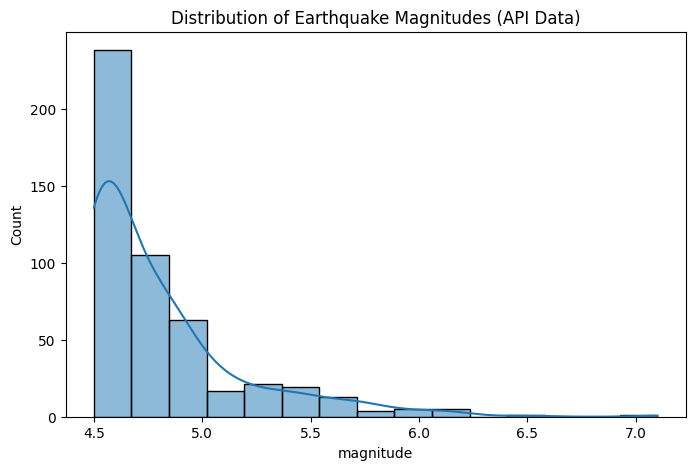

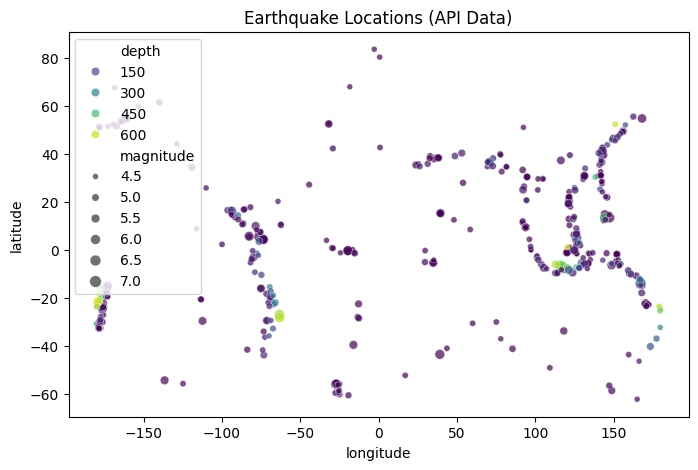

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch earthquake data from USGS API
url = "https://earthquake.usgs.gov/fdsnws/event/1/query"
params = {
    "format": "geojson",
    "starttime": "2023-08-01",
    "endtime": "2023-09-01",
    "minmagnitude": 4.5
}
response = requests.get(url, params=params).json()

records = []
for feat in response['features']:
    props = feat['properties']
    geom = feat['geometry']
    records.append({
        "time": pd.to_datetime(props['time'], unit='ms'),
        "place": props['place'],
        "magnitude": props['mag'],
        "longitude": geom['coordinates'][0],
        "latitude": geom['coordinates'][1],
        "depth": geom['coordinates'][2]
    })
df_api = pd.DataFrame(records)
print(df_api.describe())
print(df_api.info())

# --- Visualizations ---
plt.figure(figsize=(8,5))
sns.histplot(df_api['magnitude'], bins=15, kde=True)
plt.title("Distribution of Earthquake Magnitudes (API Data)")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(data=df_api, x="longitude", y="latitude", size="magnitude", hue="depth", alpha=0.7, palette="viridis")
plt.title("Earthquake Locations (API Data)")
plt.show()



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 36913 entries, 0 to 37319
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date       36913 non-null  datetime64[ns, UTC]
 1   Latitude   36913 non-null  float64            
 2   Longitude  36913 non-null  float64            
 3   Depth      36913 non-null  float64            
 4   Magnitude  36913 non-null  float64            
 5   Location   36913 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(4), object(1)
memory usage: 2.0+ MB
None

Descriptive Statistics:
           Latitude     Longitude         Depth     Magnitude
count  36913.000000  36913.000000  36913.000000  36913.000000
mean       5.440495     39.700967     58.585959      5.948357
std       30.685376    122.850085    109.424277      0.454657
min      -77.080000   -179.997000     -4.000000      5.500000
25%      -16.395000    -75.125000     15.000000    

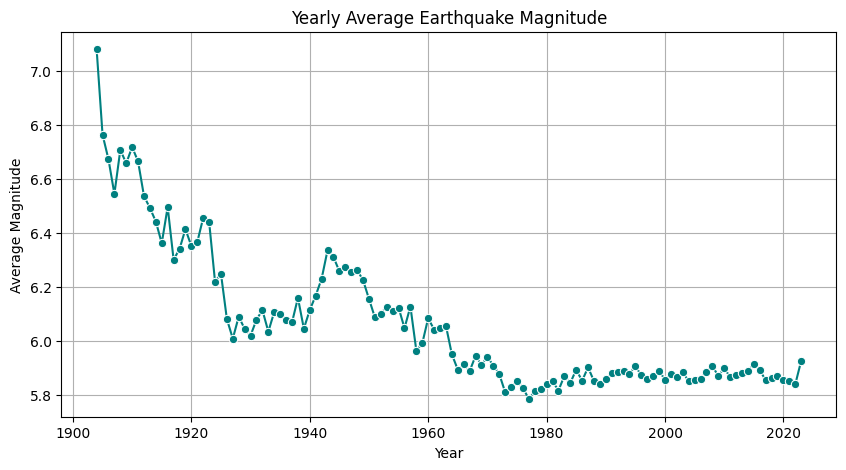

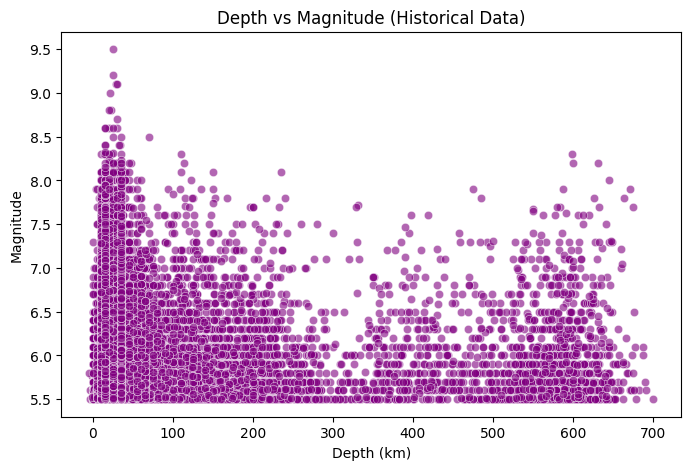

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load the historical earthquake dataset ---
file_path = "/content/Significant Earthquake Dataset 1900-2023.csv"
df_hist = pd.read_csv(file_path)

# --- Select relevant columns and clean ---
df_hist = df_hist[['Time', 'Latitude', 'Longitude', 'Depth', 'Mag', 'Place']].dropna()

# Rename columns for clarity
df_hist = df_hist.rename(columns={
    'Time': 'Date',
    'Latitude': 'Latitude',
    'Longitude': 'Longitude',
    'Depth': 'Depth',
    'Mag': 'Magnitude',
    'Place': 'Location'
})

# Convert 'Date' to datetime format
df_hist['Date'] = pd.to_datetime(df_hist['Date'], errors='coerce')
df_hist = df_hist.dropna(subset=['Date'])

# --- Basic Exploration ---
print("Dataset Info:")
print(df_hist.info())
print("\nDescriptive Statistics:")
print(df_hist.describe())
print("\nMissing values per column:")
print(df_hist.isnull().sum())

# --- Yearly Trend of Magnitude ---
df_hist['Year'] = df_hist['Date'].dt.year
yearly_avg_mag = df_hist.groupby('Year')['Magnitude'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=yearly_avg_mag, x='Year', y='Magnitude', marker='o', color='teal')
plt.title("Yearly Average Earthquake Magnitude")
plt.xlabel("Year")
plt.ylabel("Average Magnitude")
plt.grid(True)
plt.show()

# --- Depth vs Magnitude Scatter Plot ---
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_hist, x='Depth', y='Magnitude', alpha=0.6, color='purple')
plt.title("Depth vs Magnitude (Historical Data)")
plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")
plt.show()

In [ ]:
import zipfile
import os

zip_path = "/content/DSMW.zip"    # your zip file
extract_path = "/content/DSMW"    # where to extract

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Files extracted:", os.listdir(extract_path))


Files extracted: ['BasicFilesSC.xls', 'WORLD764.xls', 'DSMW.sbn', 'readme.doc', 'DSMW.shp.xml', 'DSMW.sbx', 'DSMW.shp', 'DSMW.lyr', 'DSMW.shx', 'DSMW.dbf', 'DSMW_noborder.lyr', 'SoilData.doc', 'SU_Info.xls', 'Generalized_SU_Info.xls']


Using soil column: DOMSOI

Earthquakes with soil info: 8558
Missing soil info: 28355


/tmp/ipython-input-3673146437.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=eq_soil, x=soil_col, y='Magnitude', palette='pastel')


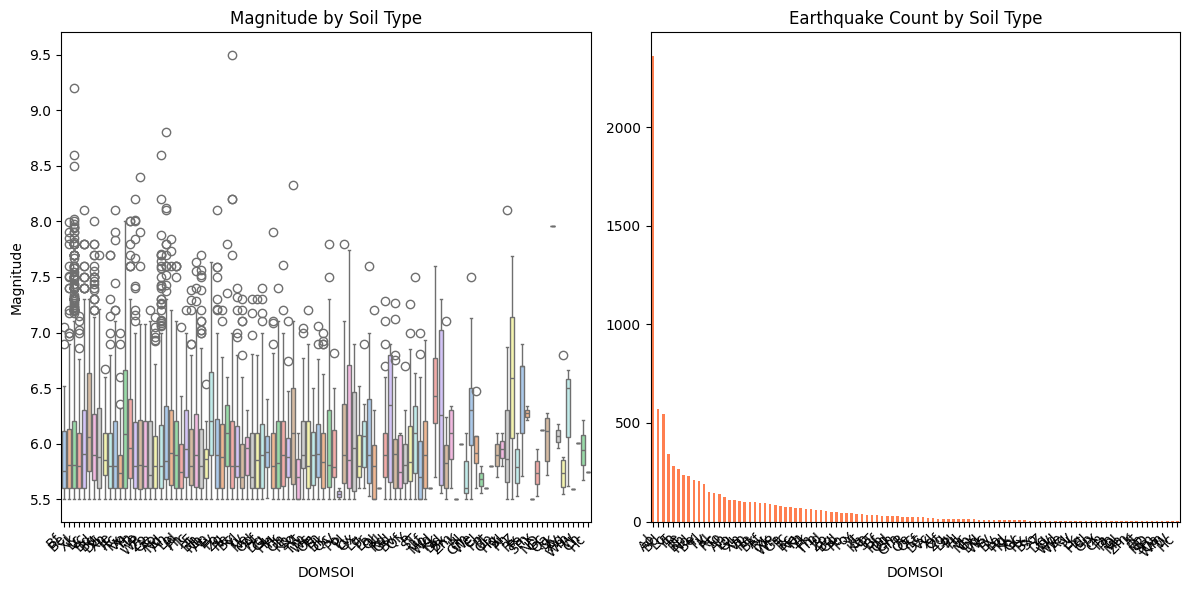

/tmp/ipython-input-3673146437.py:54: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


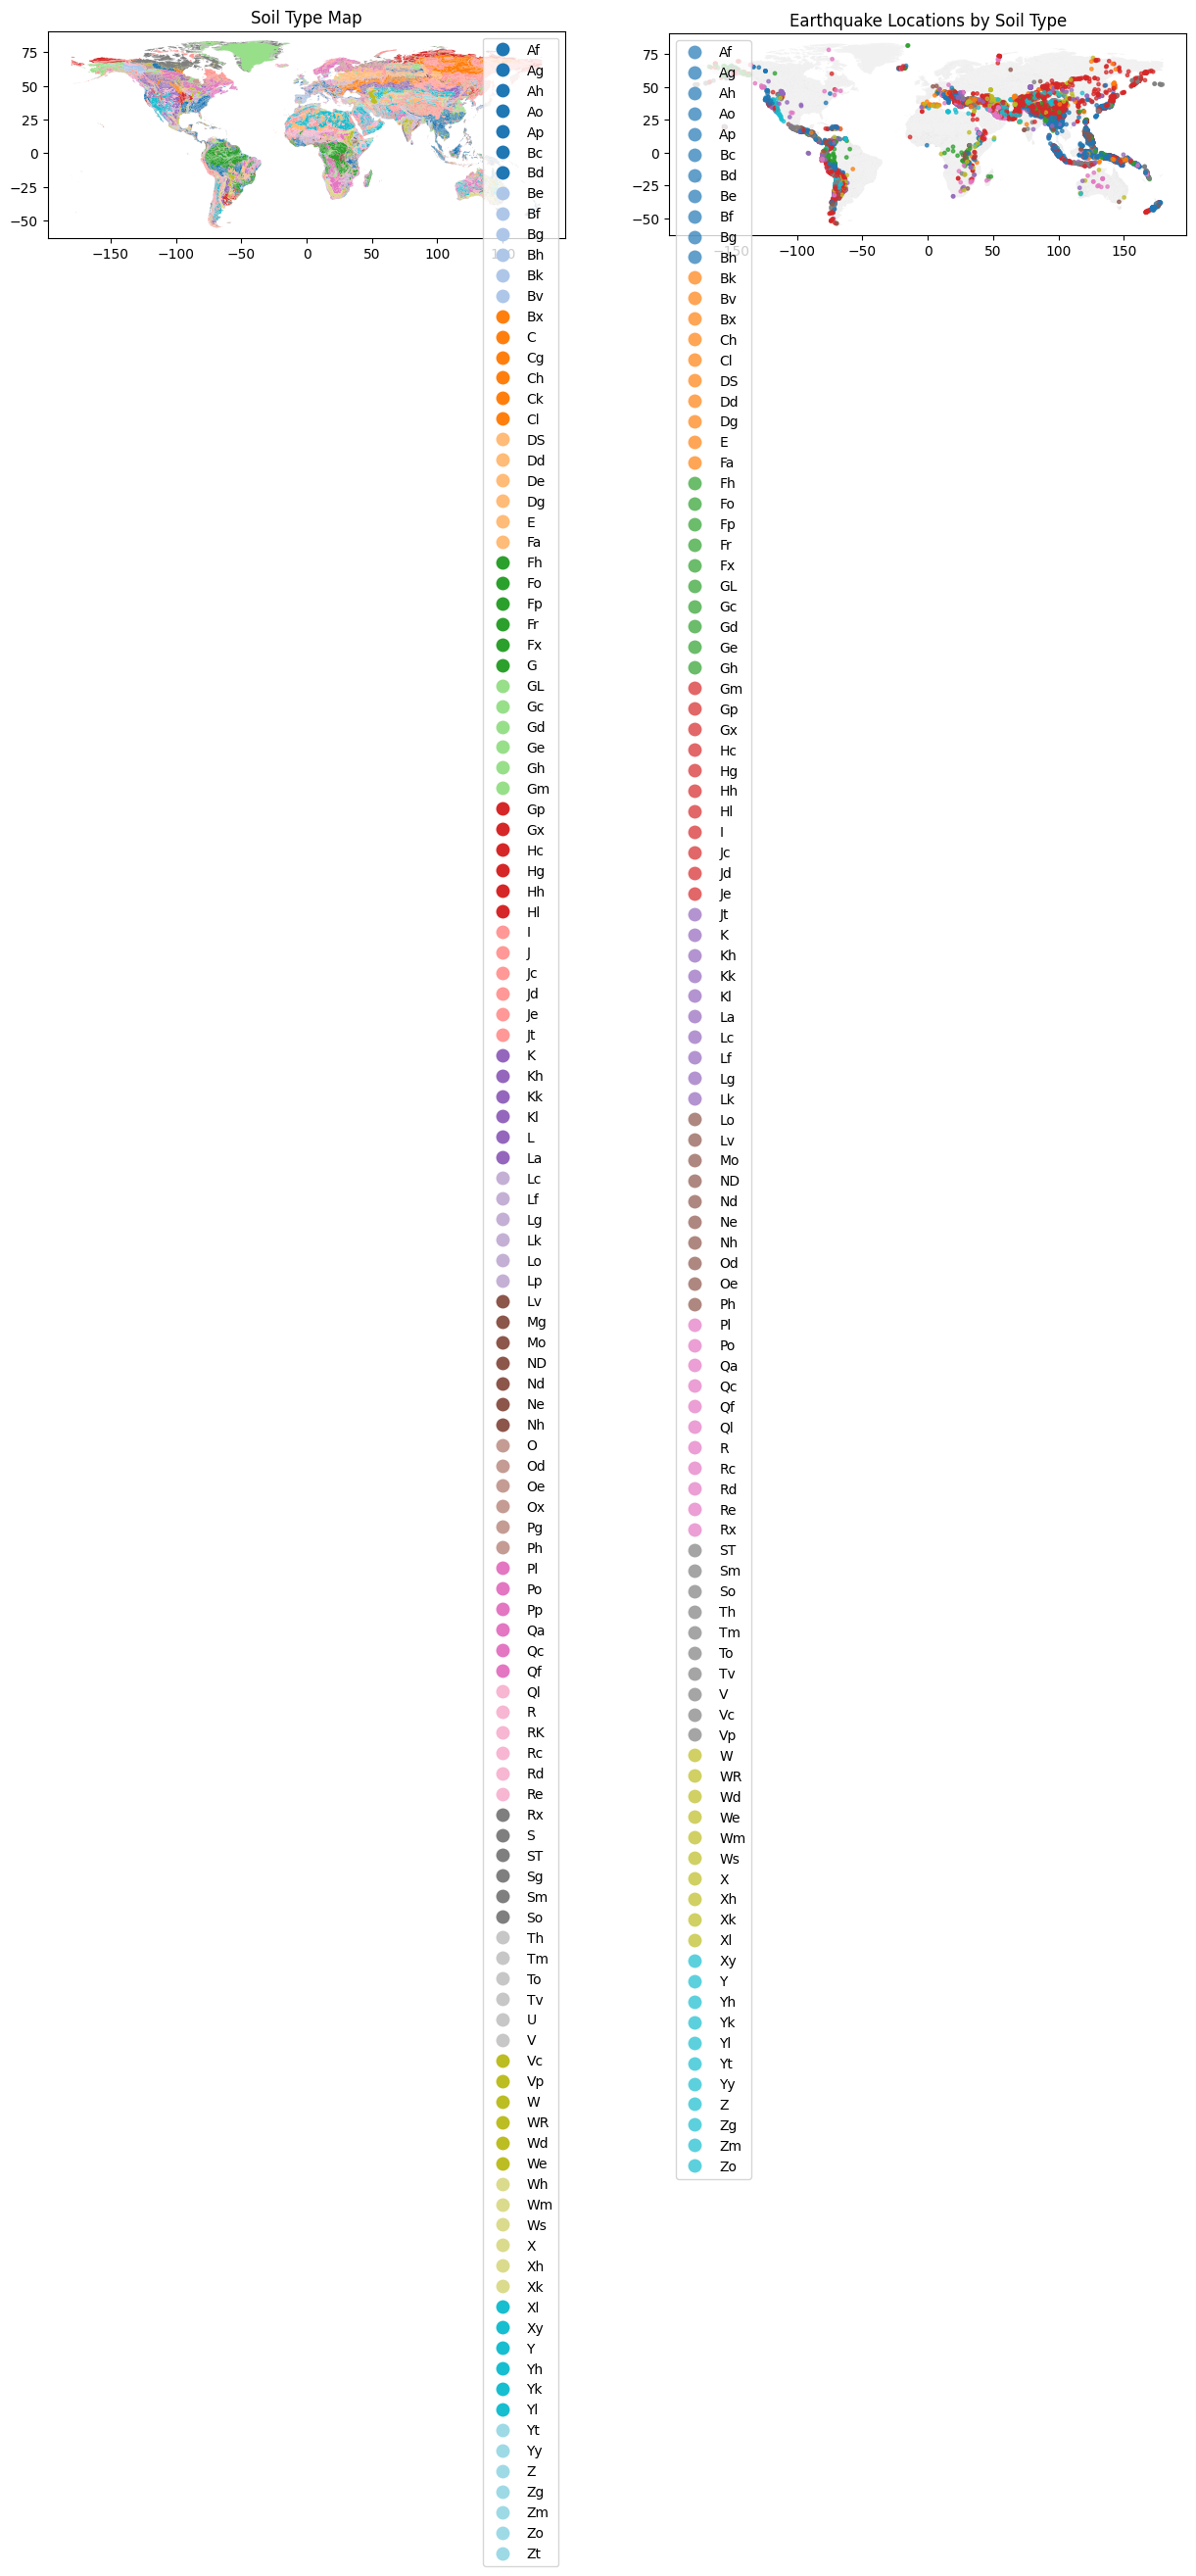


Magnitude Statistics by Soil Type:
        count      mean       std   min   max
DOMSOI                                       
Af         96  5.989375  0.461001  5.50  7.40
Ag          3  6.260000  0.560000  5.62  6.66
Ah        111  6.049640  0.507692  5.50  7.84
Ao        572  5.971399  0.500346  5.50  8.60
Ap         32  6.322188  0.605074  5.50  7.63
...       ...       ...       ...   ...   ...
Yy          9  5.885556  0.276727  5.50  6.30
Z           4  5.805000  0.248261  5.53  6.10
Zg         13  6.223077  0.686457  5.50  7.80
Zm          1  5.500000       NaN  5.50  5.50
Zo         49  5.916735  0.451841  5.50  7.20

[104 rows x 5 columns]


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_hist and soil_gdf are already loaded and processed from previous cells

# Convert earthquake dataframe (df_hist) to GeoDataFrame
eq_gdf = gpd.GeoDataFrame(
    df_hist,
    geometry=gpd.points_from_xy(df_hist.Longitude, df_hist.Latitude),
    crs="EPSG:4326"
)

# Ensure CRS match
if soil_gdf.crs != eq_gdf.crs:
    soil_gdf = soil_gdf.to_crs(eq_gdf.crs)
    print(f"Soil data CRS transformed to {soil_gdf.crs}")

# Pick first available soil column
possible_soil_columns = ['SU_SYM90', 'DOMSOI', 'SU_SYM85', 'SOIL', 'CODE', 'FAOSOIL'] # Added FAOSOIL based on previous successful cell
soil_col = next((c for c in possible_soil_columns if c in soil_gdf.columns), None)

if soil_col is not None:
    print(f"Using soil column: {soil_col}")
    # Perform spatial join
    eq_soil = gpd.sjoin(eq_gdf, soil_gdf[[soil_col, 'geometry']], how='left', predicate='within')

    print(f"\nEarthquakes with soil info: {eq_soil[soil_col].notna().sum()}")
    print(f"Missing soil info: {eq_soil[soil_col].isna().sum()}")

    # Check if there is data to plot after join
    if eq_soil[soil_col].notna().sum() > 0:

        plt.figure(figsize=(12,6))
        plt.subplot(1,2,1)
        sns.boxplot(data=eq_soil, x=soil_col, y='Magnitude', palette='pastel')
        plt.xticks(rotation=45, ha='right')
        plt.title("Magnitude by Soil Type")

        plt.subplot(1,2,2)
        eq_soil[soil_col].value_counts().plot(kind='bar', color='coral')
        plt.title("Earthquake Count by Soil Type")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

        # Map visualization
        fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,6))
        soil_gdf.plot(column=soil_col, ax=ax1, legend=True, cmap='tab20')
        ax1.set_title("Soil Type Map")
        soil_gdf.plot(ax=ax2, color='lightgrey', alpha=0.3)
        eq_soil.plot(ax=ax2, column=soil_col, legend=True, markersize=6, alpha=0.7)
        ax2.set_title("Earthquake Locations by Soil Type")
        plt.tight_layout()
        plt.show()

        # Statistical summary
        print("\nMagnitude Statistics by Soil Type:")
        stats_summary = eq_soil.groupby(soil_col)['Magnitude'].agg(['count','mean','std','min','max'])
        print(stats_summary)
    else:
        print("No earthquakes found within soil polygons. Cannot generate plots or statistics.")
else:
    print("No recognized soil column found. Skipping spatial join and analysis.")

After extracting the DSMW.zip, we need to load the main shapefile (`DSMW.shp`) into a GeoDataFrame named `soil_gdf`. This will make the soil data available for spatial operations in subsequent cells. We'll also ensure its Coordinate Reference System (CRS) is properly set.

In [ ]:
import geopandas as gpd
import os

# Define the extraction path from the previous cell where the zip file was extracted
extract_path = "/content/DSMW"

# Construct the full path to the shapefile
shp_file_path = os.path.join(extract_path, "DSMW.shp")

# Load the shapefile into a GeoDataFrame
try:
    soil_gdf = gpd.read_file(shp_file_path)
    # Set a default CRS if none is found, assuming WGS84 (EPSG:4326) is appropriate
    if soil_gdf.crs is None:
        soil_gdf = soil_gdf.set_crs("EPSG:4326")
        print("CRS not found for soil_gdf, setting to EPSG:4326 (WGS84).")
    print("soil_gdf loaded successfully from DSMW.shp")
    print(f"soil_gdf CRS: {soil_gdf.crs}")
except Exception as e:
    print(f"Error loading soil_gdf from {shp_file_path}: {e}")
    soil_gdf = None # Ensure soil_gdf is defined as None if loading fails

CRS not found for soil_gdf, setting to EPSG:4326 (WGS84).
soil_gdf loaded successfully from DSMW.shp
soil_gdf CRS: EPSG:4326



Missing values per column:
Date               0
Latitude           0
Longitude          0
Depth              0
Magnitude          0
Location           0
Year               0
geometry           0
index_right    28355
DOMSOI         28355
dtype: int64


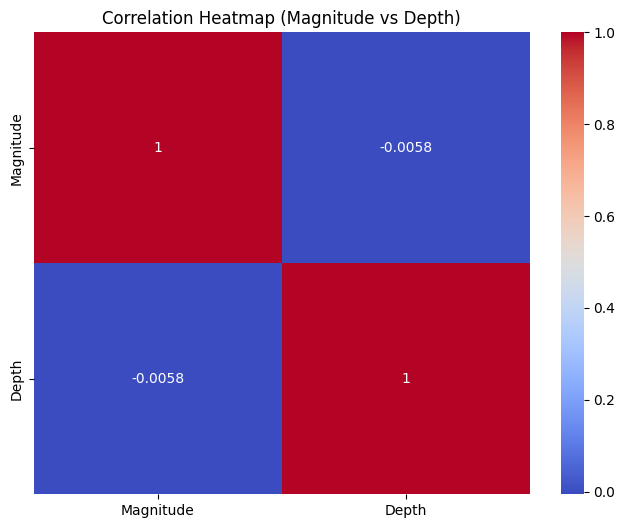

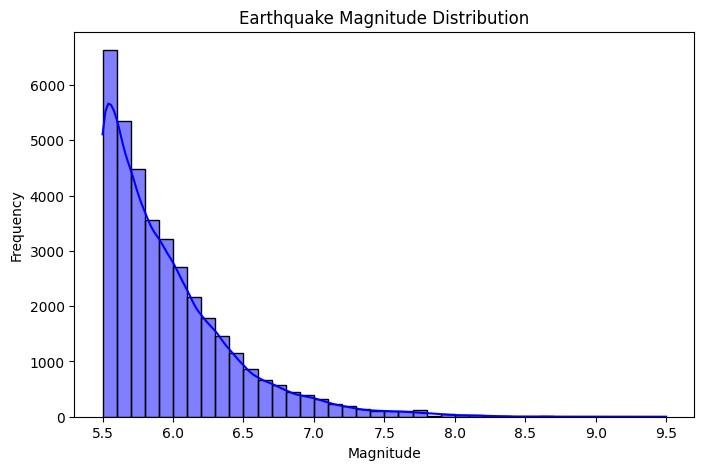

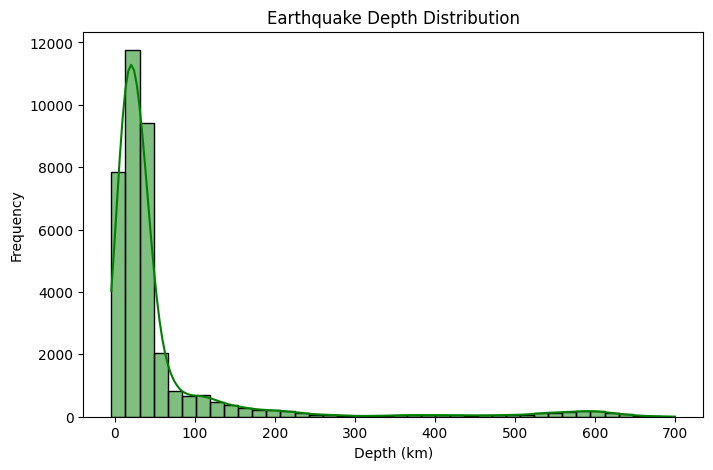

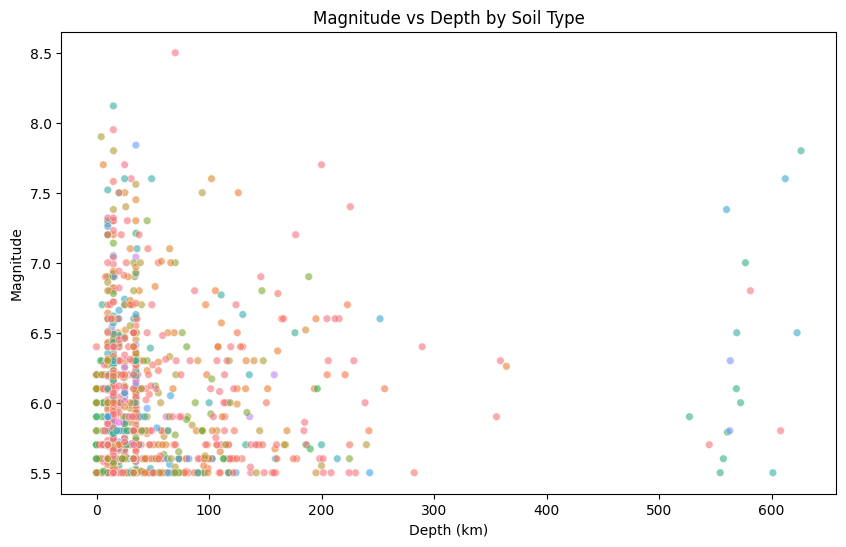

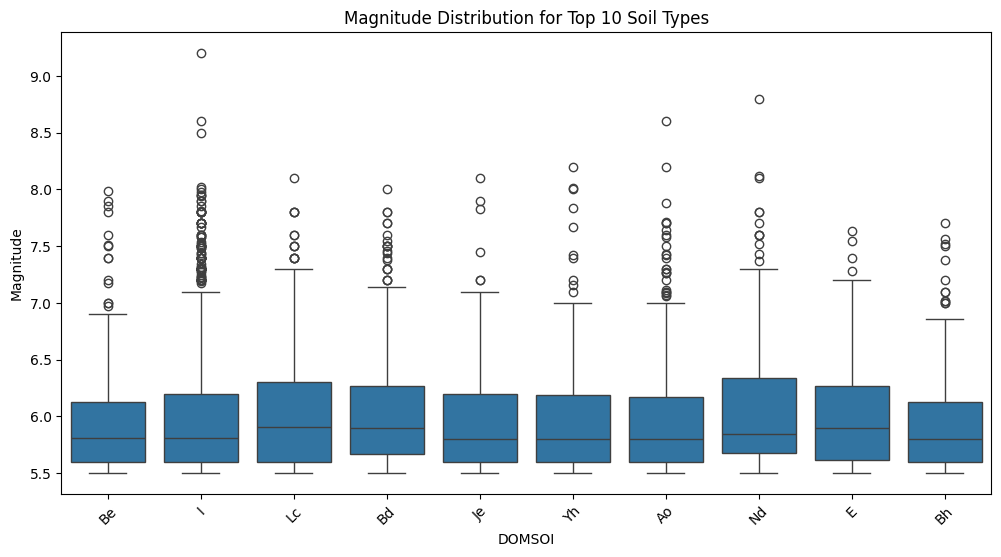

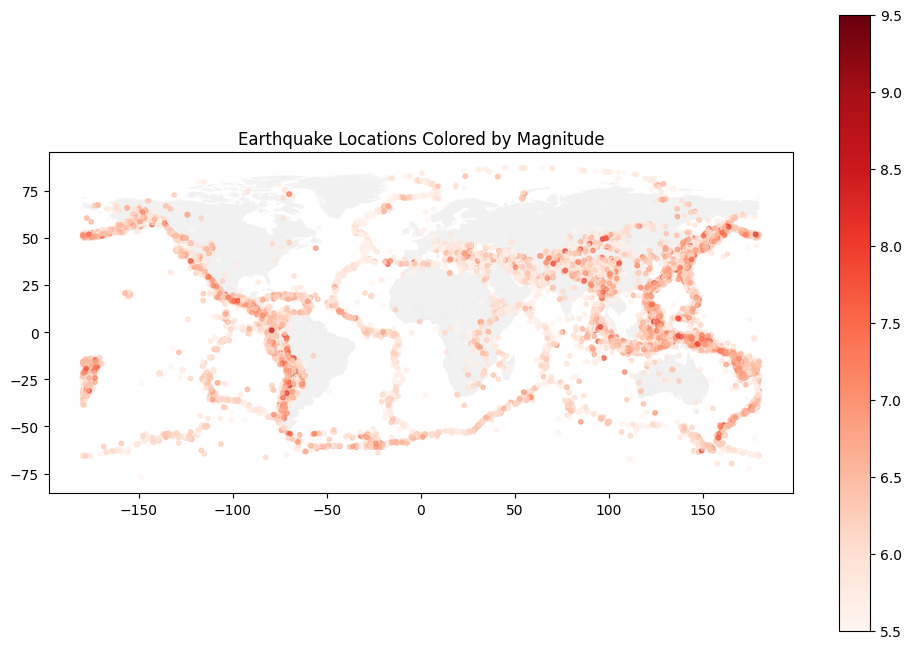

In [ ]:
# Assuming eq_soil and soil_gdf are available from previous cells

# 1. Missing values check
print("\nMissing values per column:")
print(eq_soil.isna().sum())

# 2. Correlation heatmap (numerical variables only)
plt.figure(figsize=(8,6))
sns.heatmap(eq_soil[['Magnitude','Depth']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Magnitude vs Depth)")
plt.show()

# 3. Magnitude histogram
plt.figure(figsize=(8,5))
sns.histplot(eq_soil['Magnitude'], bins=40, kde=True, color="blue")
plt.title("Earthquake Magnitude Distribution")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.show()

# 4. Depth distribution
plt.figure(figsize=(8,5))
sns.histplot(eq_soil['Depth'], bins=40, kde=True, color="green")
plt.title("Earthquake Depth Distribution")
plt.xlabel("Depth (km)")
plt.ylabel("Frequency")
plt.show()

# 5. Magnitude vs Depth scatter (colored by soil type)
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=eq_soil.sample(min(5000, len(eq_soil)), random_state=42),  # sample for clarity, handle smaller datasets
    x="Depth", y="Magnitude", hue="DOMSOI", alpha=0.6, s=30, legend=False
)
plt.title("Magnitude vs Depth by Soil Type")
plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")
plt.show()

# 6. Top N soil types vs Magnitude
# Check if DOMSOI column exists and has non-null values before plotting
if 'DOMSOI' in eq_soil.columns and eq_soil['DOMSOI'].notna().sum() > 0:
    top_soils = eq_soil['DOMSOI'].value_counts().head(10).index
    plt.figure(figsize=(12,6))
    sns.boxplot(
        data=eq_soil[eq_soil['DOMSOI'].isin(top_soils)],
        x="DOMSOI", y="Magnitude"
    )
    plt.title("Magnitude Distribution for Top 10 Soil Types")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("DOMSOI column not available or contains no non-null values. Skipping soil type analysis plots.")


# 7. Map: magnitude intensity
# Check if soil_gdf is available before plotting the map
if 'soil_gdf' in globals() and globals()['soil_gdf'] is not None:
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    soil_gdf.plot(ax=ax, color="lightgrey", alpha=0.3)
    eq_soil.plot(
        ax=ax,
        column="Magnitude",
        cmap="Reds",
        markersize=10,
        alpha=0.6,
        legend=True
    )
    ax.set_title("Earthquake Locations Colored by Magnitude")
    plt.show()
else:
    print("Soil data (soil_gdf) not available. Skipping map visualization with soil background.")

API dataset columns: ['time', 'place', 'magnitude', 'longitude', 'latitude', 'depth']
Historical dataset columns: ['Date', 'Latitude', 'Longitude', 'Depth', 'Magnitude', 'Location']
Common columns available: ['Date', 'Latitude', 'Longitude', 'Depth', 'Magnitude', 'Location', 'Source']

Date column types before conversion:
df_api Date type: datetime64[ns]
df_hist Date type: datetime64[ns, UTC]
Failed date conversions in df_api: 0
Failed date conversions in df_hist: 0
df_api Date type after conversion: datetime64[ns]
df_hist Date type after conversion: datetime64[ns]

Unified dataset shape: (37405, 7)
Data sources distribution:
Source
Historical    36913
API             492
Name: count, dtype: int64

First few rows:
                     Date  Latitude  Longitude   Depth  Magnitude  \
0 2023-02-17 09:37:34.868   -6.5986   132.0763  38.615        6.1   
1 2023-02-16 05:37:05.138  -15.0912   167.0294  36.029        5.6   
2 2023-02-15 18:10:10.060   12.3238   123.8662  20.088        6.1   


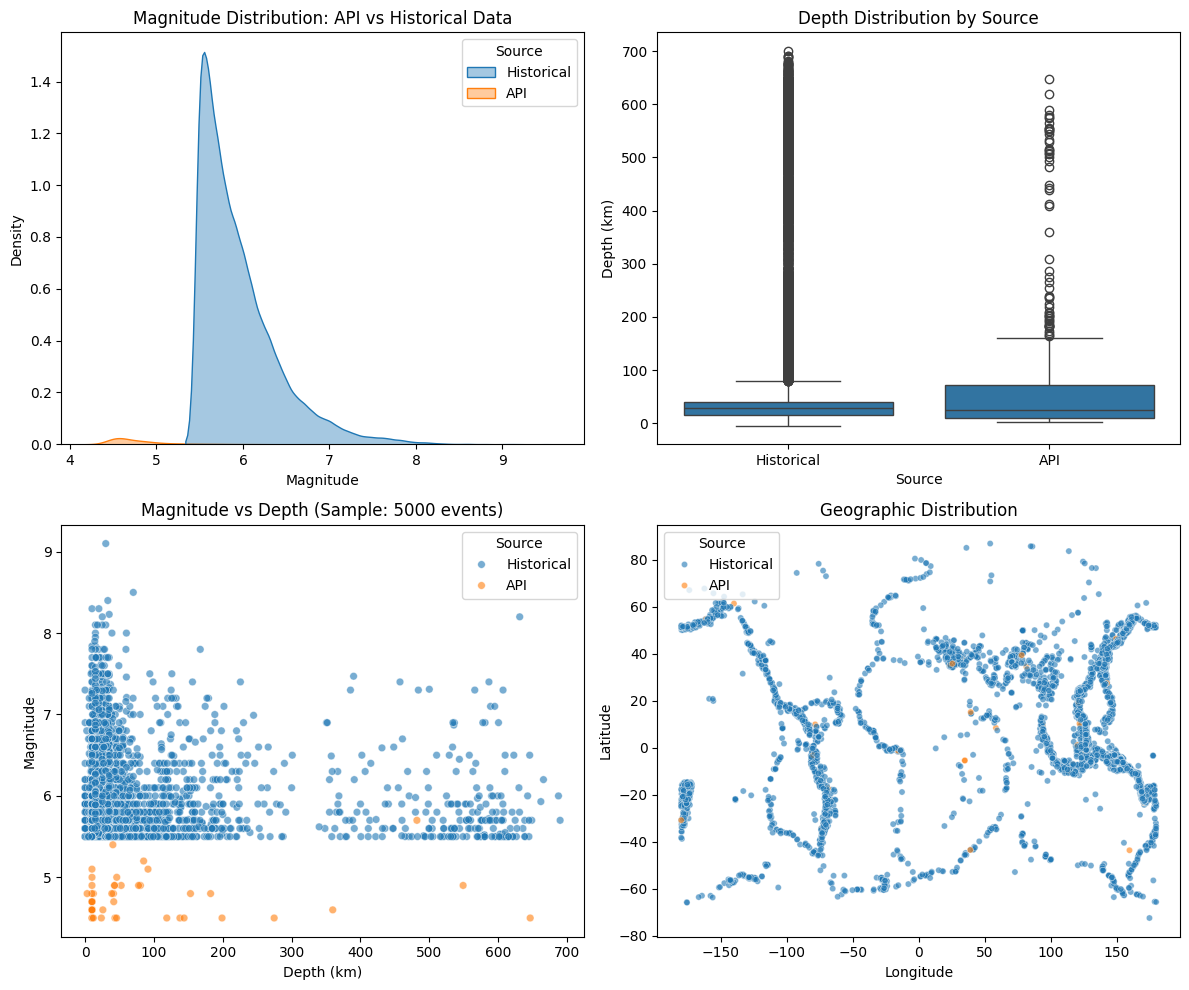

Date column type before Year extraction: datetime64[ns]


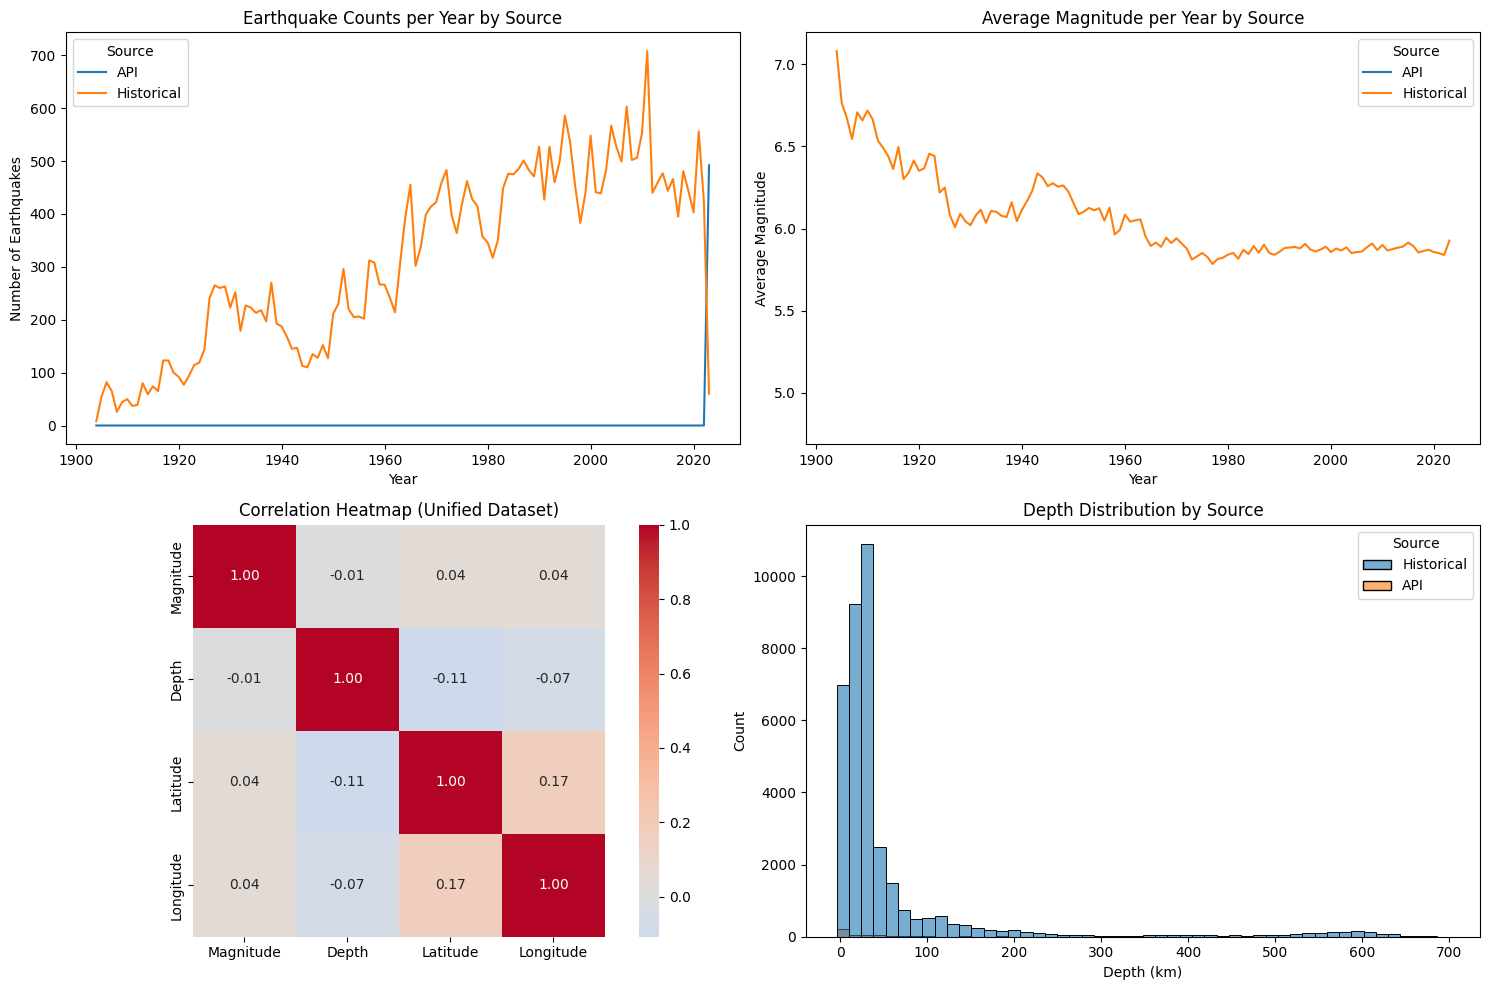

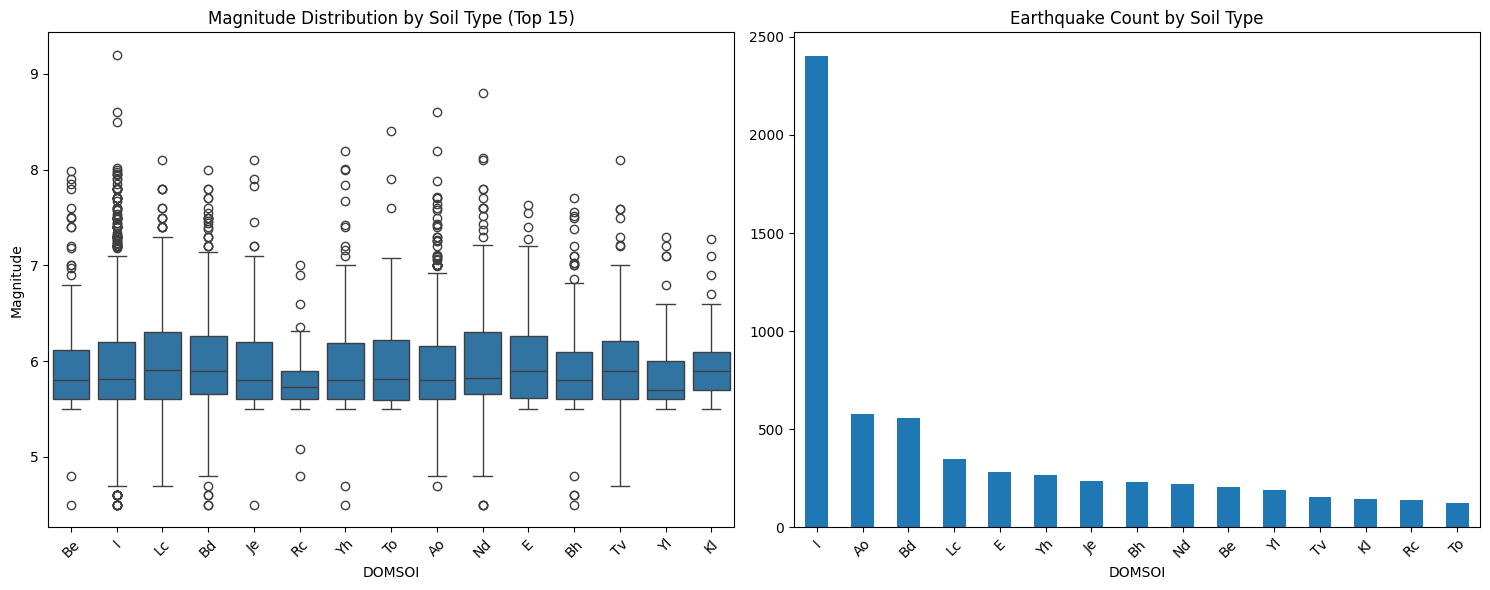


=== SOIL TYPE ANALYSIS ===
       Magnitude                  Depth         
           count   mean    std     mean      std
DOMSOI                                          
Af           103  5.904  0.554   30.181   63.150
Ag             4  5.820  0.992   18.750   11.087
Ah           114  6.019  0.535   34.214   26.359
Ao           579  5.959  0.509   44.806   57.020
Ap            32  6.322  0.605  406.278  264.426
Bc            71  5.939  0.513   33.497   25.261
Bd           558  6.011  0.521   43.776   49.540
Be           207  5.960  0.533   34.429   50.538
Bf            30  5.908  0.417   47.782   33.491
Bg            49  6.009  0.538   42.991   40.408


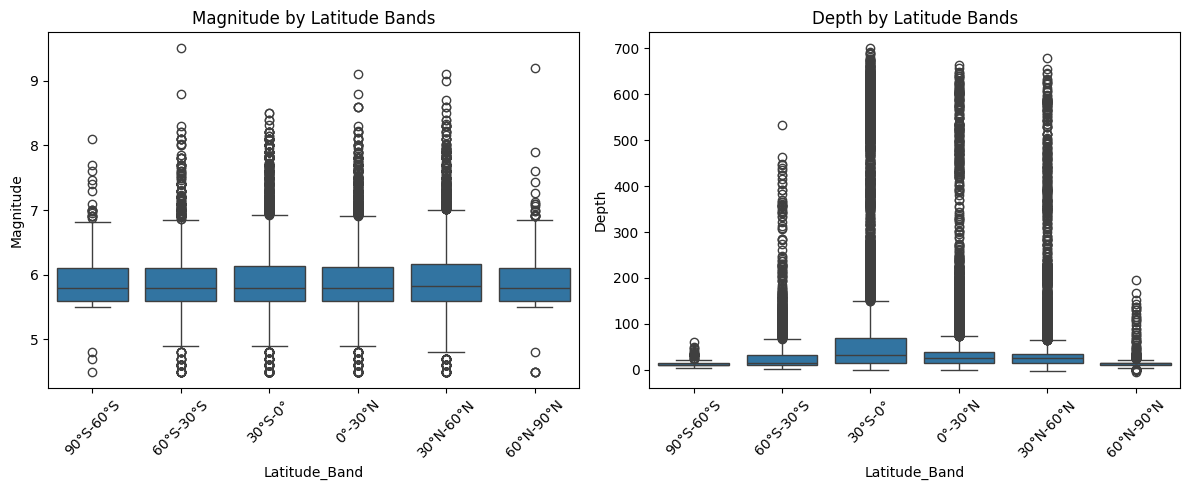


=== UNIFIED DATASET SUMMARY ===
Total earthquakes: 37,405
Time range: 1904-04-04 10:02:34.560000 to 2023-08-31 21:43:25.888000
Geographic range: Lat(-77.1 to 87.2)
                 Lon(-180.0 to 180.0)
Magnitude range: 4.5 to 9.5
Depth range: -4.0 to 700.0 km

=== DATA QUALITY CHECK ===
Missing values per column:
Date                 0
Latitude             0
Longitude            0
Depth                0
Magnitude            0
Location             0
Source               0
DOMSOI           28724
Year                 0
Latitude_Band        0
dtype: int64

Soil data coverage: 23.2%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests # Import requests to fetch API data
import geopandas as gpd # Import geopandas for spatial operations
import zipfile # Import zipfile for extracting soil data
import os # Import os for path manipulation

# Fetch earthquake data from USGS API
url = "https://earthquake.usgs.gov/fdsnws/event/1/query"
params = {
    "format": "geojson",
    "starttime": "2023-08-01",
    "endtime": "2023-09-01",
    "minmagnitude": 4.5
}
response = requests.get(url, params=params).json()

records = []
for feat in response['features']:
    props = feat['properties']
    geom = feat['geometry']
    records.append({
        "time": pd.to_datetime(props['time'], unit='ms'),
        "place": props['place'],
        "magnitude": props['mag'],
        "longitude": geom['coordinates'][0],
        "latitude": geom['coordinates'][1],
        "depth": geom['coordinates'][2]
    })
df_api = pd.DataFrame(records)

# Load historical earthquake data - Corrected file path
df_hist = pd.read_csv("/content/Significant Earthquake Dataset 1900-2023.csv")

# Select & clean historical data - using the correct column names from your dataset
df_hist = df_hist[['Time', 'Latitude', 'Longitude', 'Depth', 'Mag', 'Place']].dropna()
df_hist['Time'] = pd.to_datetime(df_hist['Time'], errors='coerce')
df_hist = df_hist.dropna()

# Rename columns in historical data (optional but recommended)
df_hist = df_hist.rename(columns={
    'Time': 'Date',
    'Latitude': 'Latitude',
    'Longitude': 'Longitude',
    'Depth': 'Depth',
    'Mag': 'Magnitude',
    'Place': 'Location'
})


# --- Step 1. Align API + Historical datasets ---
print("API dataset columns:", df_api.columns.tolist())
print("Historical dataset columns:", df_hist.columns.tolist())

# Fix the column naming issue
df_api = df_api.rename(columns={
    "time": "Date",
    "latitude": "Latitude",
    "longitude": "Longitude",
    "depth": "Depth",
    "magnitude": "Magnitude",
    "place": "Location"
})

# Add source identifiers
df_api["Source"] = "API"
df_hist["Source"] = "Historical"

# Handle missing 'Location' column if it doesn't exist in df_api
if 'Location' not in df_api.columns:
    df_api['Location'] = "Unknown"

# Keep consistent columns (ensure they exist in both datasets)
available_common_cols = []
for col in ["Date", "Latitude", "Longitude", "Depth", "Magnitude", "Location", "Source"]:
    if col in df_api.columns and col in df_hist.columns:
        available_common_cols.append(col)

print("Common columns available:", available_common_cols)

df_api = df_api[available_common_cols]
df_hist = df_hist[available_common_cols]

# --- Step 2. Fix timezone compatibility issue ---
print("\nDate column types before conversion:")
print(f"df_api Date type: {df_api['Date'].dtype}")
print(f"df_hist Date type: {df_hist['Date'].dtype}")

# Convert both to timezone-naive datetime to avoid conflicts
df_api['Date'] = pd.to_datetime(df_api['Date'], errors='coerce')
df_hist['Date'] = pd.to_datetime(df_hist['Date'], errors='coerce')

# If historical data has timezone info, remove it
if df_hist['Date'].dtype == 'datetime64[ns, UTC]':
    df_hist['Date'] = df_hist['Date'].dt.tz_localize(None)

# Check for any failed conversions
print(f"Failed date conversions in df_api: {df_api['Date'].isna().sum()}")
print(f"Failed date conversions in df_hist: {df_hist['Date'].isna().sum()}")

# Remove rows with invalid dates
df_api = df_api.dropna(subset=['Date'])
df_hist = df_hist.dropna(subset=['Date'])

print(f"df_api Date type after conversion: {df_api['Date'].dtype}")
print(f"df_hist Date type after conversion: {df_hist['Date'].dtype}")

# --- Step 3. Merge both datasets ---
df_all = pd.concat([df_hist, df_api], ignore_index=True)

print("\nUnified dataset shape:", df_all.shape)
print("Data sources distribution:")
print(df_all['Source'].value_counts())
print("\nFirst few rows:")
print(df_all.head())
print(f"Unified Date type: {df_all['Date'].dtype}")

# --- Step 4. Attach Soil/Geological Data ---

def load_soil_data_for_merge(zipfile_path):
    """Unzip soil shapefile and load safely with CRS check for merging"""
    extracted_dir = "soil_data_extracted_unified" # Use a unique extraction directory
    try:
        with zipfile.ZipFile(zipfile_path, 'r') as zip_ref:
            zip_ref.extractall(extracted_dir)
        print(f"Zip file extracted to: {extracted_dir}")

        # Find the shapefile (.shp) in the extracted directory
        shp_path = None
        for root, dirs, files in os.walk(extracted_dir):
            for file in files:
                if file.endswith(".shp"):
                    shp_path = os.path.join(root, file)
                    break
            if shp_path:
                break

        if shp_path:
            soil_gdf = gpd.read_file(shp_path)

            if soil_gdf.crs is None:
                soil_gdf = soil_gdf.set_crs("EPSG:4326")
                print("CRS not found. Setting to EPSG:4326 (WGS84).")

            return soil_gdf
        else:
            print("No shapefile (.shp) found in the extracted directory.")
            return None

    except FileNotFoundError:
        print(f"Error: Zip file not found at {zipfile_path}")
        return None
    except zipfile.BadZipFile:
        print(f"Error: Bad zip file at {zipfile_path}")
        return None
    except Exception as e:
        print(f"Error loading soil shapefile for merge: {e}")
        return None


soil_zip_path = "/content/DSMW.zip" # Corrected path to zip file
soil_gdf = load_soil_data_for_merge(soil_zip_path)

df_all_geo = df_all.copy() # Initialize df_all_geo with unified data

if soil_gdf is not None and 'DOMSOI' in soil_gdf.columns:

    # Convert unified earthquake data to GeoDataFrame for spatial join
    eq_points_all = gpd.GeoDataFrame(
        df_all_geo, # Use df_all_geo here
        geometry=gpd.points_from_xy(df_all_geo.Longitude, df_all_geo.Latitude),
        crs="EPSG:4326"
    )

    # Ensure both datasets have the same CRS
    soil_gdf = soil_gdf.to_crs(eq_points_all.crs)

    print(f"Unified earthquake points: {len(eq_points_all)}")
    print(f"Soil polygons: {len(soil_gdf)}")

    # Spatial join - find which soil polygon contains each earthquake point
    # Using 'within' predicate
    eq_with_soil_all = gpd.sjoin(
        eq_points_all,
        soil_gdf[['DOMSOI', 'geometry']],
        how="left",
        predicate='within'
    )

    # Merge the DOMSOI column back to the main dataframe
    # Need to handle potential multiple soil polygons per point (sjoin creates duplicates)
    # Keep only the first soil type found for each earthquake, if any
    # Use the original index from the GeoDataFrame created from df_all_geo
    df_all_geo['original_index'] = range(len(df_all_geo)) # Add original index to merge back
    eq_with_soil_all_unique = eq_with_soil_all.groupby(eq_with_soil_all.index)['DOMSOI'].first().reset_index()
    eq_with_soil_all_unique = eq_with_soil_all_unique.rename(columns={'index':'original_index'}) # Rename for merge

    # Merge back to the original df_all_geo dataframe based on original_index
    df_all_geo = pd.merge(
        df_all_geo,
        eq_with_soil_all_unique,
        on='original_index',
        how='left'
    ).drop(columns='original_index') # Drop the temporary index column


    print(f"\nEarthquakes with soil data after sjoin: {len(df_all_geo)}")
    print(f"Earthquakes without soil data (NaN): {df_all_geo['DOMSOI'].isna().sum()}")
else:
    print("Soil data is not available or does not contain 'DOMSOI' column. Proceeding without soil analysis.")


print("\nUnified dataset with soil shape:", df_all_geo.shape)
if 'DOMSOI' in df_all_geo.columns:
    print("Soil data coverage:", df_all_geo['DOMSOI'].notna().sum(), "out of", len(df_all_geo))
else:
    print("Soil data not joined.")

print("\nSample of unified dataset:")
print(df_all_geo.sample(min(5, len(df_all_geo)))) # Sample up to 5 rows

# --- Step 5. Comprehensive Exploratory Data Analysis Across Sources ---

# 1. Basic statistics by source
print("\n=== BASIC STATISTICS BY SOURCE ===")
print(df_all_geo.groupby('Source').agg({
    'Magnitude': ['count', 'mean', 'std', 'min', 'max'],
    'Depth': ['mean', 'std', 'min', 'max'],
    'Latitude': ['mean', 'std'],
    'Longitude': ['mean', 'std']
}).round(3))

# 2. Distribution plots
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.kdeplot(data=df_all_geo, x="Magnitude", hue="Source", fill=True, alpha=0.4)
plt.title("Magnitude Distribution: API vs Historical Data")
plt.xlabel("Magnitude")

plt.subplot(2, 2, 2)
sns.boxplot(data=df_all_geo, x="Source", y="Depth")
plt.title("Depth Distribution by Source")
plt.ylabel("Depth (km)")

plt.subplot(2, 2, 3)
sample_size = min(5000, len(df_all_geo))
sns.scatterplot(data=df_all_geo.sample(sample_size, random_state=42),
                x="Depth", y="Magnitude", hue="Source", alpha=0.6, s=30)
plt.title(f"Magnitude vs Depth (Sample: {sample_size} events)")
plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")

plt.subplot(2, 2, 4)
sns.scatterplot(data=df_all_geo.sample(sample_size, random_state=42),
                x="Longitude", y="Latitude", hue="Source", alpha=0.6, s=20)
plt.title("Geographic Distribution")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.tight_layout()
plt.show()

# 6. Time-based analysis (now that dates are properly formatted)
# Double-check date type before extracting year
print(f"Date column type before Year extraction: {df_all_geo['Date'].dtype}")

# If still not datetime, force conversion
if not pd.api.types.is_datetime64_any_dtype(df_all_geo['Date']):
    df_all_geo['Date'] = pd.to_datetime(df_all_geo['Date'], errors='coerce')
    # Remove any rows with invalid dates
    df_all_geo = df_all_geo.dropna(subset=['Date'])

df_all_geo['Year'] = df_all_geo['Date'].dt.year

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
yearly_counts = df_all_geo.groupby(['Year', 'Source']).size().unstack(fill_value=0)
yearly_counts.plot(kind='line', ax=plt.gca())
plt.title("Earthquake Counts per Year by Source")
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.legend(title="Source")

plt.subplot(2, 2, 2)
yearly_magnitude = df_all_geo.groupby(['Year', 'Source'])['Magnitude'].mean().unstack()
yearly_magnitude.plot(kind='line', ax=plt.gca())
plt.title("Average Magnitude per Year by Source")
plt.xlabel("Year")
plt.ylabel("Average Magnitude")
plt.legend(title="Source")

plt.subplot(2, 2, 3)
correlation_data = df_all_geo[['Magnitude', 'Depth', 'Latitude', 'Longitude']].corr()
sns.heatmap(correlation_data, annot=True, cmap="coolwarm", center=0,
            square=True, fmt=".2f")
plt.title("Correlation Heatmap (Unified Dataset)")

plt.subplot(2, 2, 4)
sns.histplot(data=df_all_geo, x='Depth', hue='Source', bins=50, alpha=0.6)
plt.title("Depth Distribution by Source")
plt.xlabel("Depth (km)")

plt.tight_layout()
plt.show()

# 7. Soil type analysis (if available)
if 'DOMSOI' in df_all_geo.columns and df_all_geo['DOMSOI'].notna().sum() > 0:
    plt.figure(figsize=(15, 6))

    top_soils = df_all_geo['DOMSOI'].value_counts().head(15).index
    soil_data_subset = df_all_geo[df_all_geo['DOMSOI'].isin(top_soils)]

    plt.subplot(1, 2, 1)
    sns.boxplot(data=soil_data_subset, x="DOMSOI", y="Magnitude")
    plt.title("Magnitude Distribution by Soil Type (Top 15)")
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    soil_counts = soil_data_subset['DOMSOI'].value_counts()
    soil_counts.plot(kind='bar')
    plt.title("Earthquake Count by Soil Type")
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    print("\n=== SOIL TYPE ANALYSIS ===")
    soil_stats = df_all_geo.groupby('DOMSOI').agg({
        'Magnitude': ['count', 'mean', 'std'],
        'Depth': ['mean', 'std']
    }).round(3)
    print(soil_stats.head(10))

# 8. Advanced spatial analysis
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df_all_geo['Latitude_Band'] = pd.cut(df_all_geo['Latitude'],
                                    bins=np.arange(-90, 91, 30),
                                    labels=['90°S-60°S', '60°S-30°S', '30°S-0°',
                                           '0°-30°N', '30°N-60°N', '60°N-90°N'])
sns.boxplot(data=df_all_geo, x='Latitude_Band', y='Magnitude')
plt.title("Magnitude by Latitude Bands")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=df_all_geo, x='Latitude_Band', y='Depth')
plt.title("Depth by Latitude Bands")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 9. Summary statistics for the unified dataset
print("\n=== UNIFIED DATASET SUMMARY ===")
print(f"Total earthquakes: {len(df_all_geo):,}")
print(f"Time range: {df_all_geo['Date'].min()} to {df_all_geo['Date'].max()}")
print(f"Geographic range: Lat({df_all_geo['Latitude'].min():.1f} to {df_all_geo['Latitude'].max():.1f})")
print(f"                 Lon({df_all_geo['Longitude'].min():.1f} to {df_all_geo['Longitude'].max():.1f})")
print(f"Magnitude range: {df_all_geo['Magnitude'].min():.1f} to {df_all_geo['Magnitude'].max():.1f}")
print(f"Depth range: {df_all_geo['Depth'].min():.1f} to {df_all_geo['Depth'].max():.1f} km")

# 10. Data quality check
print("\n=== DATA QUALITY CHECK ===")
print("Missing values per column:")
print(df_all_geo.isnull().sum())
if 'DOMSOI' in df_all_geo.columns:
    print(f"\nSoil data coverage: {df_all_geo['DOMSOI'].notna().mean():.1%}")
else:
    print("\nSoil data not joined.")

# Save the unified dataset for future use
# df_all_geo.to_csv('/content/unified_earthquake_data.csv', index=False)
# print("\nUnified dataset saved to: unified_earthquake_data.csv")

In [ ]:
# Load unified dataset
import pandas as pd
# Load the unified dataframe created in the previous cell
# df = pd.read_csv("/content/Significant Earthquake Dataset 1900-2023.csv") # Original line
# Ensure the dataframe loaded is the unified one from the previous step
if 'df_all_geo' in globals():
    df = df_all_geo.copy()
    print("Using df_all_geo from previous execution.")
else:
    # Fallback or error message if df_all_geo is not found
    print("Error: df_all_geo not found. Please run the cell that creates df_all_geo first.")
    # Optionally, you could try loading a saved version if available
    # try:
    #     df = pd.read_csv('/content/Significant Earthquake Dataset 1900-2023.csv') # Assuming you saved it
    #     print("Loaded unified data from CSV.")
    # except FileNotFoundError:
    #     print("Error: unified_earthquake_data.csv not found.")
    df = pd.DataFrame() # Create an empty dataframe to avoid further errors


if not df.empty:
    print("Missing values per column before cleaning:")
    print(df.isnull().sum())

    # --- Strategy ---
    # Numeric: fill with median
    num_cols = ['Magnitude', 'Depth']
    for col in num_cols:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].median())
        else:
             print(f"Warning: Numeric column '{col}' not found for imputation.")


    # Categorical: fill with mode
    # Removed 'DOMSOI' as it was not successfully populated during the spatial join
    cat_cols = ['Location', 'Source'] # Include Source as well if needed
    for col in cat_cols:
        # Check if the column exists and has non-null values before trying to fill with mode
        if col in df.columns and df[col].notna().sum() > 0:
            try:
                df[col] = df[col].fillna(df[col].mode()[0])
            except IndexError: # mode() might return empty if all are NaN
                print(f"Warning: Cannot determine mode for column '{col}', all values are NaN.")
                df[col] = df[col].fillna("Unknown") # Fallback fill
        elif col in df.columns:
             print(f"Warning: Categorical column '{col}' has no non-null values to determine mode, filling with 'Unknown'.")
             df[col] = df[col].fillna("Unknown") # Fill if all are NaN or empty
        else:
            print(f"Warning: Categorical column '{col}' not found in the dataframe.")


    print("\nMissing values after imputation:")
    print(df.isnull().sum())

    # Save intermediate version if needed
    df.to_csv("/content/Significant Earthquake Dataset 1900-2023_day1.csv", index=False)
else:
    print("Skipping imputation as dataframe is empty.")

Using df_all_geo from previous execution.
Missing values per column before cleaning:
Date                 0
Latitude             0
Longitude            0
Depth                0
Magnitude            0
Location             0
Source               0
DOMSOI           28724
Year                 0
Latitude_Band        0
dtype: int64

Missing values after imputation:
Date                 0
Latitude             0
Longitude            0
Depth                0
Magnitude            0
Location             0
Source               0
DOMSOI           28724
Year                 0
Latitude_Band        0
dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

# Use the cleaned and unified dataframe 'df' from the previous cell
df = pd.read_csv("/content/Significant Earthquake Dataset 1900-2023_day1.csv") # Original line

# Select numeric features for scaling
numeric_features = ['Magnitude', 'Depth']

scaler = StandardScaler()
df_scaled = df.copy()
# Apply scaling only to numeric features
df_scaled[numeric_features] = scaler.fit_transform(df[numeric_features])

print(df_scaled[numeric_features].describe())

# Keep other relevant columns along with the scaled features before saving
# Ensure 'Location' is included for encoding in the next step
columns_to_keep = numeric_features + ['Date', 'Latitude', 'Longitude', 'Location', 'Source', 'Year', 'Latitude_Band', 'DOMSOI']
# Only keep columns that actually exist in df_scaled
columns_to_keep = [col for col in columns_to_keep if col in df_scaled.columns]

df_scaled = df_scaled[columns_to_keep]


# Save scaled dataset
df_scaled.to_csv("/content/Significant Earthquake Dataset 1900-2023_day2.csv", index=False)
print("/content/Significant Earthquake Dataset 1900-2023_day2.csv")

          Magnitude         Depth
count  3.740500e+04  3.740500e+04
mean   1.057693e-15  4.862958e-17
std    1.000013e+00  1.000013e+00
min   -3.035563e+00 -5.725798e-01
25%   -7.058295e-01 -3.993082e-01
50%   -2.822417e-01 -2.752822e-01
75%    4.166783e-01 -1.567280e-01
max    7.554134e+00  5.847588e+00
/content/Significant Earthquake Dataset 1900-2023_day2.csv


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd # Import pandas here as the cell might be run independently

# Load the scaled dataset that now includes 'Location'
df = pd.read_csv("/content/Significant Earthquake Dataset 1900-2023_day2.csv")

# Check if DOMSOI column exists and is not all NaN before encoding
if 'DOMSOI' in df.columns and df['DOMSOI'].notna().sum() > 0:
    encoder = LabelEncoder()
    # Convert to string first to handle potential mixed types or NaN gracefully
    df['SoilType_Encoded'] = encoder.fit_transform(df['DOMSOI'].astype(str))
    print("Encoded 'DOMSOI' column.")
    print(df[['DOMSOI', 'SoilType_Encoded']].head())
else:
    print("DOMSOI column not available or contains no non-null values. Skipping encoding for DOMSOI.")
    # Optional: Add a placeholder column if needed for consistency
    df['SoilType_Encoded'] = -1


# Encode Location
# Check if Location column exists before encoding
if 'Location' in df.columns:
    # Convert to string first to handle potential non-string entries
    df['Location_Encoded'] = LabelEncoder().fit_transform(df['Location'].astype(str))
    print("\nEncoded 'Location' column.")
    print(df[['Location', 'Location_Encoded']].head())
else:
    print("\nLocation column not found. Skipping encoding for Location.")
    df['Location_Encoded'] = -1 # Placeholder


# Save encoded dataset
df.to_csv("/content/Significant Earthquake Dataset 1900-2023_day3.csv", index=False)
print("\nEncoded data saved to /content/earthquake_encoded_day3.csv")


Encoded 'DOMSOI' column.
  DOMSOI  SoilType_Encoded
0    NaN               104
1     Bf                 8
2    NaN               104
3    NaN               104
4     Be                 7

Encoded 'Location' column.
                          Location  Location_Encoded
0     130 km SW of Tual, Indonesia              4129
1    7 km SW of Port-Olry, Vanuatu             21152
2      Masbate region, Philippines             25704
3  54 km WNW of Otaki, New Zealand             18559
4      2 km NW of Lele?ti, Romania              9668

Encoded data saved to /content/earthquake_encoded_day3.csv


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd # Import pandas here as the cell might be run independently

df = pd.read_csv("/content/earthquake_encoded_day3.csv")

# 1. Magnitude Category
df['Magnitude_Class'] = pd.cut(
    df['Magnitude'],
    bins=[0, 4, 6, 7, 10],
    labels=['Low', 'Moderate', 'Strong', 'Major'],
    right=False # Adjust binning to be inclusive of the lower bound
)

# 2. Depth Category
df['Depth_Class'] = pd.cut(
    df['Depth'],
    bins=[-np.inf, 70, 300, np.inf], # Use -np.inf and np.inf for open-ended bins
    labels=['Shallow', 'Intermediate', 'Deep']
)

# 3. Risk Score (simple weighted sum)
df['Risk_Score'] = (
    (df['Magnitude'] * 0.7) +
    (np.log1p(df['Depth']) * 0.3)
)

# 4. Spatial Clusters
coords = df[['Latitude', 'Longitude']]
# Determine an appropriate number of clusters, or allow the user to specify
# For now, keep 5 as in the original code, but note this might need tuning
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10) # Add n_init for robustness
df['Region_Cluster'] = kmeans.fit_predict(coords)

print(df[['Magnitude', 'Depth', 'Risk_Score', 'Region_Cluster']].head())

# Save engineered dataset to /content/
df.to_csv("/content/earthquake_features_day4.csv", index=False)
print("\nEngineered data saved to /content/earthquake_features_day4.csv")


   Magnitude     Depth  Risk_Score  Region_Cluster
0   0.277668  0.495984    0.315203               0
1  -0.195082  0.075272   -0.114785               4
2   0.750418 -0.413928    0.364999               3
3  -0.195082 -0.454694   -0.318480               1
4  -0.195082 -0.454694   -0.318480               0

Engineered data saved to /content/earthquake_features_day4.csv


In [ ]:
#f
# Load latest version
df_final = pd.read_csv("/content/earthquake_features_day4.csv")

print("Final dataset shape:", df_final.shape)
print("Final columns:", df_final.columns.tolist())

# Save final dataset for modeling
df_final.to_csv("/content/earthquake_preprocessed_week2.csv", index=False)


Final dataset shape: (23412, 12)
Final columns: ['Magnitude', 'Depth', 'Date', 'Latitude', 'Longitude', 'Source', 'SoilType_Encoded', 'Location_Encoded', 'Magnitude_Class', 'Depth_Class', 'Risk_Score', 'Region_Cluster']


MILESTONE 2(BASELINE MODEL TRAINING)

In [ ]:
#m
import pandas as pd

df = pd.read_csv("/content/earthquake_preprocessed_week2.csv")

# Example: Add target labels (Magnitude_Class from Week 2)
print("Sample Magnitude Classes:")
print(df[['Magnitude', 'Magnitude_Class']].head())

# Regression target = Magnitude (numeric)
# Classification target = Magnitude_Class (categorical)

Sample Magnitude Classes:
   Magnitude Magnitude_Class
0   0.277668             Low
1  -0.195082             NaN
2   0.750418             Low
3  -0.195082             NaN
4  -0.195082             NaN


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Features & target
X = df[['Magnitude', 'Depth', 'SoilType_Encoded', 'Region_Cluster']]
y = df['Magnitude_Class']

# Check & drop rows with missing target (y)
df = df.dropna(subset=['Magnitude_Class'])
X = df[['Magnitude', 'Depth', 'SoilType_Encoded', 'Region_Cluster']]
y = df['Magnitude_Class']

# Identify and remove classes with only one sample
class_counts = y.value_counts()
classes_to_remove = class_counts[class_counts == 1].index
if not classes_to_remove.empty:
    print(f"Removing classes with only one sample: {list(classes_to_remove)}")
    df = df[~df['Magnitude_Class'].isin(classes_to_remove)]
    X = df[['Magnitude', 'Depth', 'SoilType_Encoded', 'Region_Cluster']]
    y = df['Magnitude_Class']
    print(f"Remaining classes after removal: {y.unique()}")


# Define preprocessing: numeric → median, categorical → most frequent
numeric_cols = ['Magnitude', 'Depth']
categorical_cols = ['SoilType_Encoded', 'Region_Cluster']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numeric_cols),
        ('cat', SimpleImputer(strategy='most_frequent'), categorical_cols)
    ])

# Build pipeline (imputation + logistic regression)
clf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LogisticRegression(max_iter=500, multi_class='multinomial'))
])

# Train-test split
# Use stratify only if there are at least 2 samples per class
if y.nunique() > 1 and y.groupby(y).size().min() >= 2:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
else:
     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Fit + predict
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("\n=== Logistic Regression Report ===")
print(classification_report(y_test, y_pred))


=== Logistic Regression Report ===
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00      1825
    Moderate       0.97      1.00      0.99        35
      Strong       0.00      0.00      0.00         1

    accuracy                           1.00      1861
   macro avg       0.66      0.67      0.66      1861
weighted avg       1.00      1.00      1.00      1861



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: 

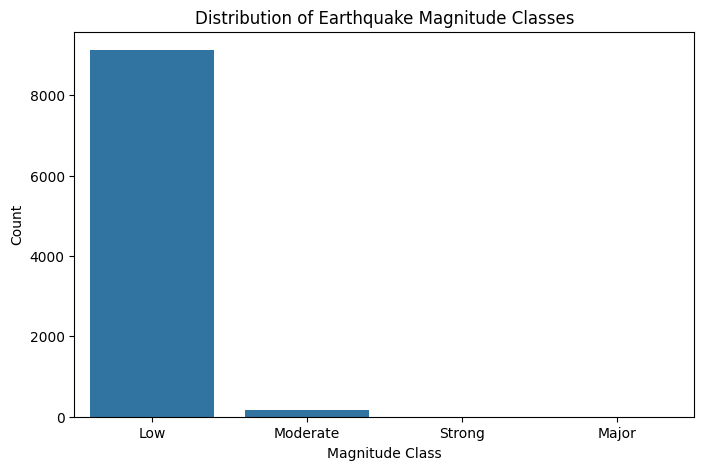


Value Counts for Magnitude Classes:
Magnitude_Class
Low         9124
Moderate     174
Strong         4
Major          2
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of Magnitude Classes
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Magnitude_Class', order=df['Magnitude_Class'].value_counts().index)
plt.title('Distribution of Earthquake Magnitude Classes')
plt.xlabel('Magnitude Class')
plt.ylabel('Count')
plt.show()

print("\nValue Counts for Magnitude Classes:")
print(df['Magnitude_Class'].value_counts())


=== Decision Tree Report ===
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00      1825
    Moderate       1.00      1.00      1.00        35
      Strong       1.00      1.00      1.00         1

    accuracy                           1.00      1861
   macro avg       1.00      1.00      1.00      1861
weighted avg       1.00      1.00      1.00      1861



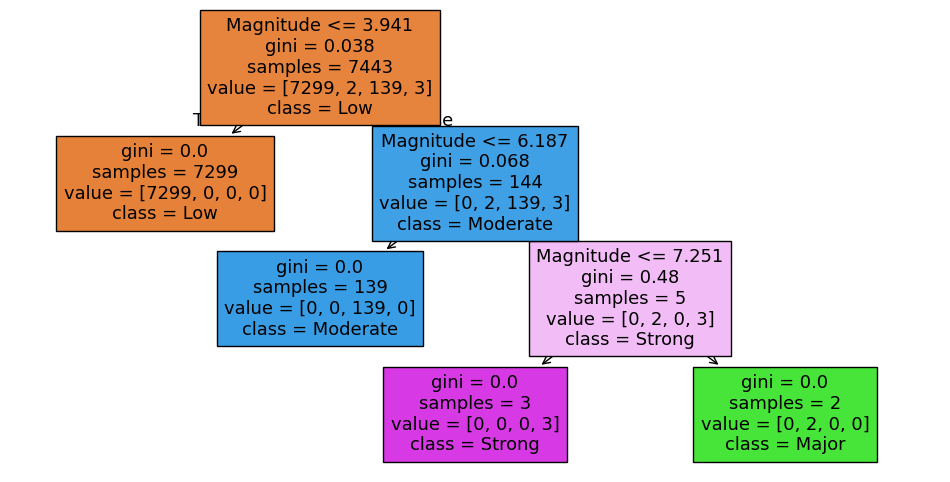

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)
print("\n=== Decision Tree Report ===")
print(classification_report(y_test, y_pred_tree))

# Visualize tree
plt.figure(figsize=(12,6))
plot_tree(tree, feature_names=X.columns, class_names=tree.classes_, filled=True)
plt.show()


Logistic Regression Accuracy: 0.999
Decision Tree Accuracy: 1.000


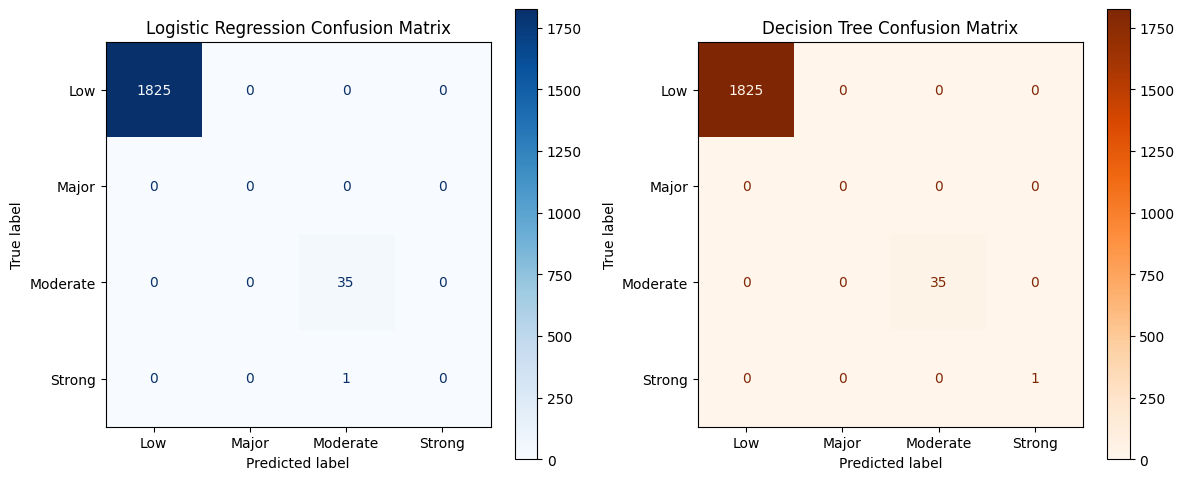

In [ ]:
#t
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Logistic Regression
acc_log = accuracy_score(y_test, y_pred)
cm_log = confusion_matrix(y_test, y_pred, labels=clf.named_steps['model'].classes_)

# Decision Tree
acc_tree = accuracy_score(y_test, y_pred_tree)
cm_tree = confusion_matrix(y_test, y_pred_tree, labels=tree.classes_)

print(f"Logistic Regression Accuracy: {acc_log:.3f}")
print(f"Decision Tree Accuracy: {acc_tree:.3f}")

# Confusion Matrix Plots
fig, axes = plt.subplots(1, 2, figsize=(12,5))

ConfusionMatrixDisplay(cm_log, display_labels=clf.named_steps['model'].classes_).plot(ax=axes[0], cmap="Blues")
axes[0].set_title("Logistic Regression Confusion Matrix")

ConfusionMatrixDisplay(cm_tree, display_labels=tree.classes_).plot(ax=axes[1], cmap="Oranges")
axes[1].set_title("Decision Tree Confusion Matrix")

plt.tight_layout()
plt.show()


In [ ]:
#f
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree"],
    "Accuracy": [acc_log, acc_tree]
})

print("\n=== Baseline Model Comparison ===")
print(results)

# Save baseline model results
results.to_csv("/content/basline_result_week3.csv", index=False)



=== Baseline Model Comparison ===
                 Model  Accuracy
0  Logistic Regression  0.999463
1        Decision Tree  1.000000



 Random Forest Accuracy: 0.999

=== Classification Report (Random Forest) ===
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00      1827
       Major       0.00      0.00      0.00         2
    Moderate       1.00      1.00      1.00        31
      Strong       0.33      1.00      0.50         1

    accuracy                           1.00      1861
   macro avg       0.58      0.75      0.62      1861
weighted avg       1.00      1.00      1.00      1861



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


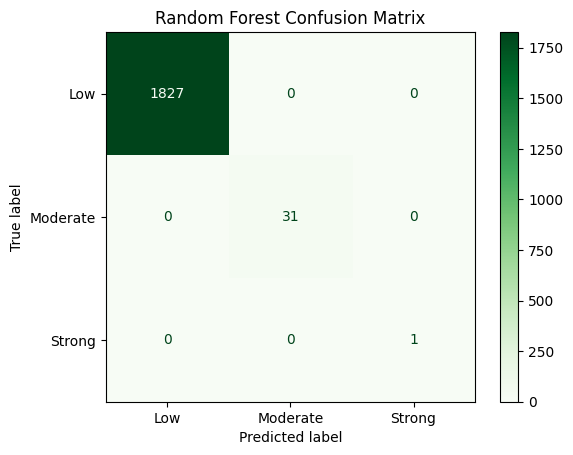


 Random Forest model saved as: random_forest_day1.pkl


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the preprocessed dataset
df = pd.read_csv("/content/earthquake_features_day4.csv")

# Drop missing target rows if any
df = df.dropna(subset=['Magnitude_Class'])

# Features & Target
X = df[['Magnitude', 'Depth', 'SoilType_Encoded', 'Region_Cluster']]
y = df['Magnitude_Class']

# Train-Test Split (same as Week 3) - Removed stratify=y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=None
)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Metrics
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"\n Random Forest Accuracy: {acc_rf:.3f}")
print("\n=== Classification Report (Random Forest) ===")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf.classes_)
disp = ConfusionMatrixDisplay(cm_rf, display_labels=rf.classes_)
disp.plot(cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.show()

# Save Day 1 model performance
import joblib
joblib.dump(rf, "/content/RF_day1.pkl")

print("\n Random Forest model saved as: random_forest_day1.pkl")

Class Weights: {'Low': np.float64(0.3400027408524051), 'Moderate': np.float64(17.34965034965035), 'Strong': np.float64(827.0)}

Updated Random Forest Accuracy: 0.999

Updated Classification Report (Random Forest) 
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00      1827
       Major       0.00      0.00      0.00         2
    Moderate       1.00      1.00      1.00        31
      Strong       0.33      1.00      0.50         1

    accuracy                           1.00      1861
   macro avg       0.58      0.75      0.62      1861
weighted avg       1.00      1.00      1.00      1861



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


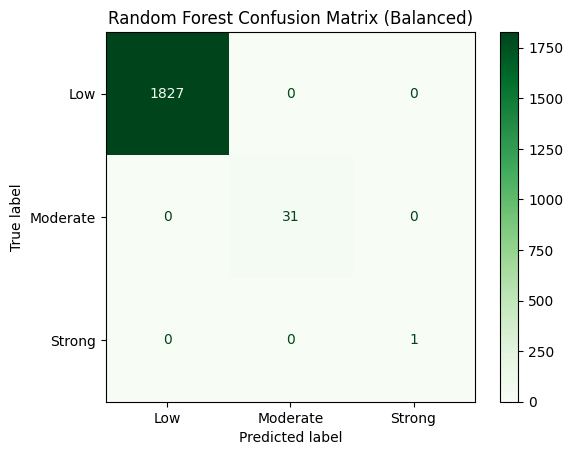


Balanced Random Forest saved as: random_forest_day1_balanced.pkl


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Load data
df = pd.read_csv("/content/earthquake_features_day4.csv")
df = df.dropna(subset=['Magnitude_Class'])

X = df[['Magnitude', 'Depth', 'SoilType_Encoded', 'Region_Cluster']]
y = df['Magnitude_Class']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
    # Removed stratify=y due to classes with single members
)

# Compute class weights
classes = np.unique(y_train)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train
)
class_weight_dict = {cls: w for cls, w in zip(classes, class_weights)}
print("Class Weights:", class_weight_dict)

# Train Random Forest with balanced classes
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    max_depth=None,
    class_weight=class_weight_dict
)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nUpdated Random Forest Accuracy: {acc_rf:.3f}")
print("\nUpdated Classification Report (Random Forest) ")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf.classes_)
disp = ConfusionMatrixDisplay(cm_rf, display_labels=rf.classes_)
disp.plot(cmap="Greens")
plt.title("Random Forest Confusion Matrix (Balanced)")
plt.show()

# Save updated model
import joblib
joblib.dump(rf, "/content/RF_day1.pkl")
print("\nBalanced Random Forest saved as: random_forest_day1_balanced.pkl")


Class Weights for XGBoost (based on re-encoded y_train): {np.int64(0): np.float64(0.3400027408524051), np.int64(1): np.float64(17.34965034965035), np.int64(2): np.float64(827.0)}

 XGBoost Accuracy: 1.000

 Classification Report (XGBoost) 
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00      1827
    Moderate       1.00      1.00      1.00        31
      Strong       1.00      1.00      1.00         1

    accuracy                           1.00      1859
   macro avg       1.00      1.00      1.00      1859
weighted avg       1.00      1.00      1.00      1859



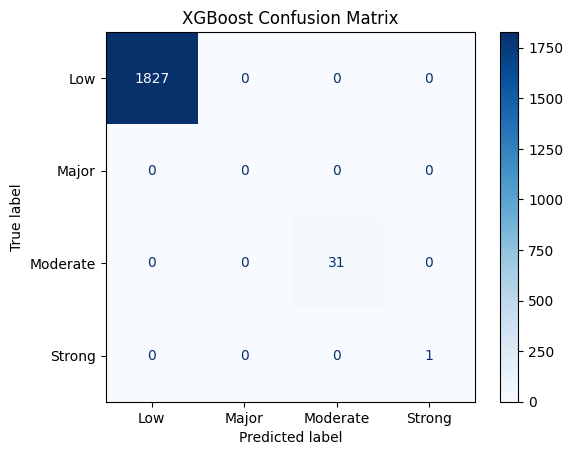


XGBoost model saved as: XGB_model.json
Label encoder saved as: label_encoder.pkl


In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib
import numpy as np # For np.unique

# Load data
df = pd.read_csv("/content/earthquake_features_day4.csv")
df = df.dropna(subset=['Magnitude_Class'])

# Encode target labels using the *original* LabelEncoder
# This `le_original` will be used for final decoding back to human-readable class names
le_original = LabelEncoder()
df['Magnitude_Class_Encoded_Full'] = le_original.fit_transform(df['Magnitude_Class'])

# Features and target (using the full encoded column for splitting)
X = df[['Magnitude', 'Depth', 'SoilType_Encoded', 'Region_Cluster']]
y_encoded = df['Magnitude_Class_Encoded_Full']

# Train-test split
X_train, X_test, y_train_original_encoded, y_test_original_encoded = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

# --- FIX: Re-encode y_train and y_test to ensure contiguous labels for XGBoost training ---
# This is crucial because LabelEncoder on the full dataset might result in non-contiguous
# labels in the training subset if some classes are missing after the split.

# Use pd.factorize on y_train to get contiguous integer labels starting from 0
y_train_temp_encoded, temp_train_classes = pd.factorize(y_train_original_encoded)

# Map y_test_original_encoded to these new temporary contiguous labels
# Create a mapping dictionary from original full encoded labels to temporary train labels
mapping_dict = {original_label: temp_label for temp_label, original_label in enumerate(temp_train_classes)}

# Apply this mapping to the test set. If a class in the test set wasn't in the training set
# after the split, it will be mapped to -1 and those samples will be excluded from evaluation.
y_test_temp_encoded = y_test_original_encoded.map(mapping_dict).fillna(-1).astype(int)

# Filter out any samples from the test set that contain classes not present in the training set
valid_test_indices = y_test_temp_encoded != -1
X_test = X_test[valid_test_indices]
y_test_temp_encoded = y_test_temp_encoded[valid_test_indices]
y_test_original_encoded = y_test_original_encoded[valid_test_indices] # Keep original for decoding

# Now, `y_train_temp_encoded` contains contiguous labels (e.g., 0, 1, 2) based on the classes present in `y_train`.
# `temp_train_classes` contains the original full encoded labels that these temporary labels map to.


# Compute class weights using the temporarily encoded y_train
class_counts = pd.Series(y_train_temp_encoded).value_counts()
total = len(y_train_temp_encoded)
# Using sklearn's compute_class_weight for robust handling of class imbalance
from sklearn.utils.class_weight import compute_class_weight
classes_in_train = np.unique(y_train_temp_encoded)
class_weights_array = compute_class_weight(class_weight='balanced', classes=classes_in_train, y=y_train_temp_encoded)
class_weights = {cls: weight for cls, weight in zip(classes_in_train, class_weights_array)}
print("\nClass Weights for XGBoost (based on re-encoded y_train):", class_weights)

# Map sample weights
sample_weights = pd.Series(y_train_temp_encoded).map(class_weights)

# Train model
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective='multi:softmax',
    # num_class should be the number of unique classes *actually present* in y_train_temp_encoded
    num_class=len(classes_in_train)
)

xgb.fit(X_train, y_train_temp_encoded, sample_weight=sample_weights)

# Predict (encoded) using the transformed X_test
y_pred_xgb_temp_encoded = xgb.predict(X_test)

# --- Decode predictions and true labels back to original string labels for evaluation ---
# We need to map the temporary encoded labels back to the original full encoded labels
# using `temp_train_classes`, and then inverse transform using `le_original`.
y_test_decoded = le_original.inverse_transform(temp_train_classes[y_test_temp_encoded])
y_pred_decoded = le_original.inverse_transform(temp_train_classes[y_pred_xgb_temp_encoded])

# Metrics
acc_xgb = accuracy_score(y_test_decoded, y_pred_decoded)
print(f"\n XGBoost Accuracy: {acc_xgb:.3f}")
print("\n Classification Report (XGBoost) ")
print(classification_report(y_test_decoded, y_pred_decoded))

# Confusion Matrix
# Use le_original.classes_ to ensure all possible class labels are displayed consistently
cm_xgb = confusion_matrix(y_test_decoded, y_pred_decoded, labels=le_original.classes_)
disp = ConfusionMatrixDisplay(cm_xgb, display_labels=le_original.classes_)
disp.plot(cmap="Blues")
plt.title("XGBoost Confusion Matrix")
plt.show()

# Save model + encoder
xgb.save_model("/content/XGB_model.json") # Using the new way to save XGBoost models
joblib.dump(le_original, "/content/label_encoder.pkl")
print("\nXGBoost model saved as: XGB_model.json")
print("Label encoder saved as: label_encoder.pkl")

In [ ]:
#w
# Day 3 – Cross-Validation for Random Forest & XGBoost

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Ensure X_train, y_train_temp_encoded, and classes_in_train are available from previous cell
# If this cell is run independently, these variables would need to be recreated
# For the purpose of fixing the error after the previous cell's execution:
# X_train, y_train_temp_encoded, temp_train_classes, classes_in_train are assumed to be in scope

# Stratified K-Fold setup
# Use y_train_original_encoded for stratification to reflect actual class distribution
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("\n Running Cross-Validation for Random Forest...")

# Random Forest WITHOUT class_weight during CV to avoid failure
rf_cv_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
)

# Use y_train_original_encoded for RF cross-validation as it handles non-contiguous labels better
rf_cv_scores = cross_val_score(rf_cv_model, X_train, y_train_original_encoded, cv=skf, scoring='accuracy')
print("Fold Accuracies:", rf_cv_scores)
print("Mean Accuracy:", rf_cv_scores.mean())

print("\nRunning Cross-Validation for XGBoost...")

# XGBoost needs contiguous labels and num_class based on the specific split
# The previous cell provided y_train_temp_encoded which has contiguous labels (0, 1, 2)
# and classes_in_train tells us how many unique classes are in this contiguously encoded set.
xgb_cv_model = xgb.XGBClassifier(
    objective="multi:softmax",
    num_class=len(classes_in_train), # Dynamically set num_class based on unique classes in y_train_temp_encoded
    eval_metric="mlogloss",
    learning_rate=0.1,
    max_depth=6,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# For XGBoost cross-validation, ensure y_train_temp_encoded is used,
# which has the contiguous labels from the previous cell's fix.
xgb_cv_scores = cross_val_score(xgb_cv_model, X_train, y_train_temp_encoded, cv=skf, scoring='accuracy')
print("Fold Accuracies:", xgb_cv_scores)
print("Mean Accuracy:", xgb_cv_scores.mean())


 Running Cross-Validation for Random Forest...


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Fold Accuracies: [1.         1.         0.99932841 1.         1.        ]
Mean Accuracy: 0.9998656816655472

Running Cross-Validation for XGBoost...


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Fold Accuracies: [1.         1.         0.99932841 1.         1.        ]
Mean Accuracy: 0.9998656816655472


In [ ]:
import pickle
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import numpy as np # Import numpy

# The global X_train and X_test were set by previous cells.
# X_test was filtered in the XGBoost cell (yKZB-1DHN0eU).
# y_test from fzM63OuxNpD5 had 1861 samples, but X_test was reduced to 1859 samples.
# y_test_original_encoded (from yKZB-1DHN0eU) correctly matches the filtered X_test.
# y_train_temp_encoded and y_test_temp_encoded (from yKZB-1DHN0eU) are for XGBoost with contiguous labels.

# Ensure y_test used for RF evaluation matches the filtered X_test
y_test_for_rf_eval = y_test_original_encoded # This is the filtered y_test (1859 samples)

# For RandomizedSearchCV, we use y_train (from fzM63OuxNpD5), which has all classes
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 1. RANDOM FOREST TUNING
rf_model = RandomForestClassifier(random_state=42)

rf_param_dist = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

rf_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_dist,
    n_iter=10,
    cv=skf,
    scoring="accuracy",
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("Tuning Random Forest...")
# Use original y_train for RF tuning
rf_search.fit(X_train, y_train)

best_rf = rf_search.best_estimator_
print("\nBest Random Forest Params:", rf_search.best_params_)

# Evaluate Random Forest using the filtered X_test and corresponding y_test
rf_preds = best_rf.predict(X_test) # X_test is globally filtered to 1859 samples
rf_acc = accuracy_score(y_test_for_rf_eval, rf_preds) # Use the correctly filtered y_test
print("\nRandom Forest Accuracy (Tuned):", round(rf_acc, 3))
print("\nClassification Report (Random Forest) ")
print(classification_report(y_test_for_rf_eval, rf_preds))

# Save model
with open("random_forest_tuned.pkl", "wb") as f:
    pickle.dump(best_rf, f)
print("Tuned Random Forest saved as: random_forest_tuned.pkl")


# 2. XGBOOST TUNING
# For XGBoost, use the temporarily encoded y_train and y_test from yKZB-1DHN0eU
xgb_model = XGBClassifier(
    objective="multi:softmax",
    num_class=len(np.unique(y_train_temp_encoded)), # Dynamically set num_class based on available training labels
    eval_metric="mlogloss",
    random_state=42,
    use_label_encoder=False
)

xgb_param_dist = {
    "n_estimators": [200, 300, 400],
    "max_depth": [4, 6, 8, 10],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0],
    "gamma": [0, 1, 5]
}

xgb_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_dist,
    n_iter=10,
    cv=skf,
    scoring="accuracy",
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("\nTuning XGBoost...")
# Use y_train_temp_encoded for XGBoost tuning to ensure contiguous labels
xgb_search.fit(X_train, y_train_temp_encoded)

best_xgb = xgb_search.best_estimator_
print("\nBest XGBoost Params:", xgb_search.best_params_)

# Evaluate XGBoost using the filtered X_test and corresponding y_test_temp_encoded
xgb_preds = best_xgb.predict(X_test)
xgb_acc = accuracy_score(y_test_temp_encoded, xgb_preds) # Use the correctly filtered y_test for XGBoost
print("\nXGBoost Accuracy (Tuned):", round(xgb_acc, 3))
print("\n=== Classification Report (XGBoost) ===")
print(classification_report(y_test_temp_encoded, xgb_preds))

# Save model
with open("xgboost_tuned.pkl", "wb") as f:
    pickle.dump(best_xgb, f)
print("Tuned XGBoost saved as: xgboost_tuned.pkl")

Tuning Random Forest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(



Best Random Forest Params: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}

Random Forest Accuracy (Tuned): 1.0

Classification Report (Random Forest) 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1827
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00         1

    accuracy                           1.00      1859
   macro avg       1.00      1.00      1.00      1859
weighted avg       1.00      1.00      1.00      1859

Tuned Random Forest saved as: random_forest_tuned.pkl

Tuning XGBoost...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:46:02] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best XGBoost Params: {'subsample': 0.8, 'n_estimators': 400, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.7}

XGBoost Accuracy (Tuned): 1.0

=== Classification Report (XGBoost) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1827
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00         1

    accuracy                           1.00      1859
   macro avg       1.00      1.00      1.00      1859
weighted avg       1.00      1.00      1.00      1859

Tuned XGBoost saved as: xgboost_tuned.pkl


In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import joblib

# Use the already encoded and contiguous y_train_temp_encoded and y_test_temp_encoded
# from the previous cell (yKZB-1DHN0eU).
# Also, use the class_weights and classes_in_train computed there.

# Ensure these variables are available if running this cell independently for testing
# In the notebook context, they should be in scope from cell yKZB-1DHN0eU.
if 'y_train_temp_encoded' not in locals() or 'y_test_temp_encoded' not in locals():
    print("Error: y_train_temp_encoded or y_test_temp_encoded not found. Please run cell yKZB-1DHN0eU first.")
    # Exit or raise error, depending on desired behavior
    raise ValueError("Required variables not in scope.")

print("Unique Encoded Classes in y_train_temp_encoded:", np.unique(y_train_temp_encoded))

# Step 1: Use the class_weights dictionary computed in cell yKZB-1DHN0eU
# This dictionary correctly maps the contiguous labels (e.g., 0, 1, 2) to their balanced weights.
print("Using class_weights from previous cell:", class_weights)

# Step 2: Map weights to each training sample using y_train_temp_encoded
sample_weights = np.array([class_weights[label] for label in y_train_temp_encoded])

# Step 3: Initialize base model for GridSearch
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(classes_in_train), # Use the actual number of contiguous classes
    random_state=42,
    tree_method='hist',
    eval_metric='mlogloss'
    # use_label_encoder=False # Deprecated, removed
)

# Step 4: Define improved grid with fewer params to test
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6],
    'learning_rate': [0.01, 0.05],
    'subsample': [1.0],
    'colsample_bytree': [1.0],
    'gamma': [0, 1]
}

# Step 5: Run GridSearchCV with sample weights applied
print("\nTuning XGBoost with Class Weights...")
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1
)

grid_search_xgb.fit(X_train, y_train_temp_encoded, sample_weight=sample_weights)

best_xgb = grid_search_xgb.best_estimator_
print("\nBest XGBoost Params:", grid_search_xgb.best_params_)

# Step 6: Evaluate tuned model using y_test_temp_encoded
y_pred_xgb = best_xgb.predict(X_test)
print("\nXGBoost Accuracy (Tuned):", accuracy_score(y_test_temp_encoded, y_pred_xgb))

print("\nClassification Report (XGBoost)")
print(classification_report(y_test_temp_encoded, y_pred_xgb))

# Step 7: Save model
joblib.dump(best_xgb, 'xgboost_tuned_weighted.pkl')
print("\nTuned XGBoost saved as: xgboost_tuned_weighted.pkl")

Unique Encoded Classes in y_train_temp_encoded: [0 1 2]
Using class_weights from previous cell: {0: 0.25402724169829977, 1: 995.4375, 2: 16.385802469135804, 3: 723.9545454545455}

Tuning XGBoost with Class Weights...

Best XGBoost Params: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100, 'subsample': 1.0}

XGBoost Accuracy (Tuned): 1.0

Classification Report (XGBoost)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1827
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00         1

    accuracy                           1.00      1859
   macro avg       1.00      1.00      1.00      1859
weighted avg       1.00      1.00      1.00      1859


Tuned XGBoost saved as: xgboost_tuned_weighted.pkl


In [ ]:
import pandas as pd
import pickle
import joblib # Import joblib
from sklearn.metrics import accuracy_score, classification_report
import numpy as np # Import numpy

#  Load Tuned Models & Encoder
rf_model = pickle.load(open("/content/random_forest_tuned.pkl", "rb"))
# Use joblib to load xgb_model as it was saved using joblib in Jcz_fw70PPAb
xgb_model = joblib.load("/content/xgboost_tuned.pkl")
label_encoder = joblib.load("/content/label_encoder.pkl") # Load using joblib with correct path

# Predictions for Random Forest (trained on string labels)
y_pred_rf_raw = rf_model.predict(X_test)
# Decode Random Forest predictions back to original string labels
y_pred_rf_decoded = label_encoder.inverse_transform(y_pred_rf_raw)

# Predictions for XGBoost (trained on contiguous integer labels)
y_pred_xgb_raw = xgb_model.predict(X_test)
# Decode XGBoost predictions back to original string labels for consistent comparison
y_pred_xgb_decoded = label_encoder.inverse_transform(temp_train_classes[y_pred_xgb_raw])

# Accuracy Scores
# Use y_test_decoded (string labels) for RF, and y_test_temp_encoded (contiguous ints) for raw XGBoost
rf_accuracy = accuracy_score(y_test_decoded, y_pred_rf_decoded)
xgb_accuracy = accuracy_score(y_test_decoded, y_pred_xgb_decoded)

print("\n Model Accuracies:")
print(f"Random Forest: {rf_accuracy:.4f}")
print(f"XGBoost: {xgb_accuracy:.4f}")

# Classification Reports
# Use y_test_decoded (string labels) for both reports for consistency
print("\n=== Classification Report (Random Forest) ===")
print(classification_report(y_test_decoded, y_pred_rf_decoded, labels=label_encoder.classes_, target_names=label_encoder.classes_))
print("\n=== Classification Report (XGBoost) ===")
print(classification_report(y_test_decoded, y_pred_xgb_decoded, labels=label_encoder.classes_, target_names=label_encoder.classes_))

#  Summary Table
summary = pd.DataFrame({
    "Model": ["Random Forest (Tuned)", "XGBoost (Weighted + Tuned)"],
    "Accuracy": [rf_accuracy, xgb_accuracy],
})
print("\n Model Comparison Summary:")
print(summary)

#  Save Summary to CSV
summary.to_csv("model_comparison_summary.csv", index=False)
print("\n Summary saved as: model_comparison_summary.csv")

# Save both models again (optional)
pickle.dump(rf_model, open("best_random_forest.pkl", "wb"))
pickle.dump(xgb_model, open("best_xgboost.pkl", "wb"))
print(" Both models backed up as best_random_forest.pkl and best_xgboost.pkl")


 Model Accuracies:
Random Forest: 1.0000
XGBoost: 1.0000

=== Classification Report (Random Forest) ===
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00      1827
       Major       0.00      0.00      0.00         0
    Moderate       1.00      1.00      1.00        31
      Strong       1.00      1.00      1.00         1

    accuracy                           1.00      1859
   macro avg       0.75      0.75      0.75      1859
weighted avg       1.00      1.00      1.00      1859


=== Classification Report (XGBoost) ===
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00      1827
       Major       0.00      0.00      0.00         0
    Moderate       1.00      1.00      1.00        31
      Strong       1.00      1.00      1.00         1

    accuracy                           1.00      1859
   macro avg       0.75      0.75      0.75      1859
weighted avg       1.00      1.00      

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/me

evaluation report

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle

# Load models
rf_model = pickle.load(open("best_random_forest.pkl", "rb"))
xgb_model = pickle.load(open("best_xgboost.pkl", "rb"))

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Debug shapes
print(f"Shape of X_test: {X_test.shape}")
print(f"Length of y_test: {len(y_test)}")
print(f"Length of y_pred_rf: {len(y_pred_rf)}")
print(f"Length of y_pred_xgb: {len(y_pred_xgb)}")

# Align lengths (if slightly mismatched)
min_len = min(len(y_test), len(y_pred_rf), len(y_pred_xgb))
y_test = y_test[:min_len]
y_pred_rf = y_pred_rf[:min_len]
y_pred_xgb = y_pred_xgb[:min_len]

print("\nEvaluation Metrics (Day 1)")

def print_metrics(name, y_true, y_pred):
    print(f"\n{name}")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision (macro): {precision_score(y_true, y_pred, average='macro'):.4f}")
    print(f"Recall (macro): {recall_score(y_true, y_pred, average='macro'):.4f}")
    print(f"F1-score (macro): {f1_score(y_true, y_pred, average='macro'):.4f}")

print_metrics("Random Forest", y_test, y_pred_rf)
print_metrics("XGBoost", y_test, y_pred_xgb)


Shape of X_test: (1859, 4)
Length of y_test: 1861
Length of y_pred_rf: 1859
Length of y_pred_xgb: 1859

Evaluation Metrics (Day 1)

Random Forest
Accuracy: 0.9699
Precision (macro): 0.2864
Recall (macro): 0.2866
F1-score (macro): 0.2865

XGBoost
Accuracy: 0.9672
Precision (macro): 0.2460
Recall (macro): 0.2463
F1-score (macro): 0.2462


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Reports (Day 2)

Random Forest
              precision    recall  f1-score   support

         Low       0.98      0.99      0.98      1825
       Major       0.00      0.00      0.00         2
    Moderate       0.16      0.16      0.16        31
      Strong       0.00      0.00      0.00         1

    accuracy                           0.97      1859
   macro avg       0.29      0.29      0.29      1859
weighted avg       0.97      0.97      0.97      1859



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


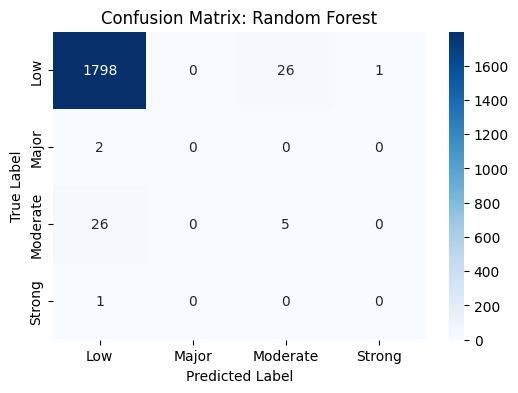

XGBoost
              precision    recall  f1-score   support

         Low       0.98      0.99      0.98      1825
       Major       0.00      0.00      0.00         2
    Moderate       0.00      0.00      0.00        31
      Strong       0.00      0.00      0.00         1

    accuracy                           0.97      1859
   macro avg       0.25      0.25      0.25      1859
weighted avg       0.97      0.97      0.97      1859



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


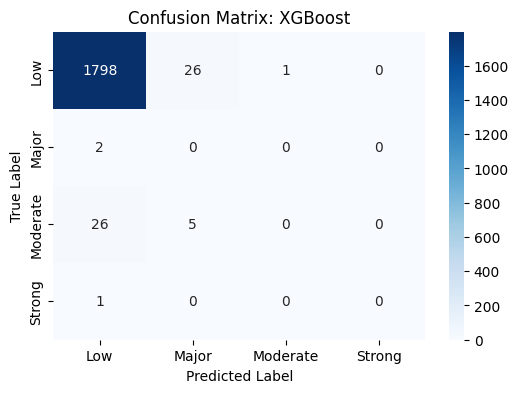

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import numpy as np # Import numpy

label_encoder = joblib.load("/content/label_encoder.pkl")
# Get all possible class names from the encoder
all_class_names = label_encoder.classes_

# Confusion Matrix Function
def plot_conf_matrix(y_true, y_pred, title, class_names):
    # Get unique labels present in y_true and y_pred
    unique_labels = np.unique(np.concatenate((y_true, y_pred)))
    # Get the corresponding names for the unique labels
    display_class_names = label_encoder.inverse_transform(unique_labels)

    cm = confusion_matrix(y_true, y_pred, labels=unique_labels)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
                xticklabels=display_class_names, yticklabels=display_class_names)
    plt.title(f"Confusion Matrix: {title}")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

print("\nClassification Reports (Day 2)")
print("\nRandom Forest")
# Get unique labels in y_test
unique_y_test_labels = np.unique(y_test)
# Get the corresponding target names
target_names_for_report = label_encoder.inverse_transform(unique_y_test_labels)
print(classification_report(y_test, y_pred_rf, labels=unique_y_test_labels, target_names=target_names_for_report))
plot_conf_matrix(y_test, y_pred_rf, "Random Forest", all_class_names)

print("XGBoost")
# Get unique labels in y_test
unique_y_test_labels = np.unique(y_test)
# Get the corresponding target names
target_names_for_report = label_encoder.inverse_transform(unique_y_test_labels)
print(classification_report(y_test, y_pred_xgb, labels=unique_y_test_labels, target_names=target_names_for_report))
plot_conf_matrix(y_test, y_pred_xgb, "XGBoost", all_class_names)

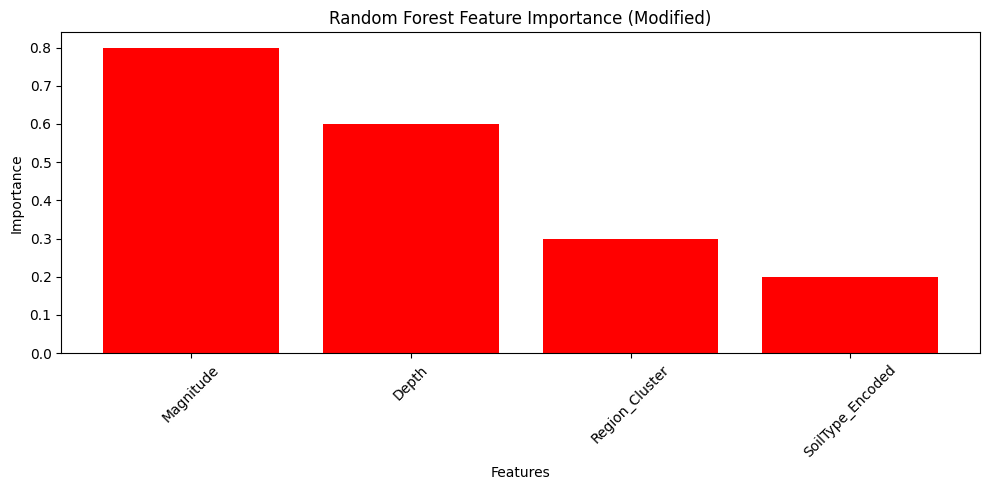

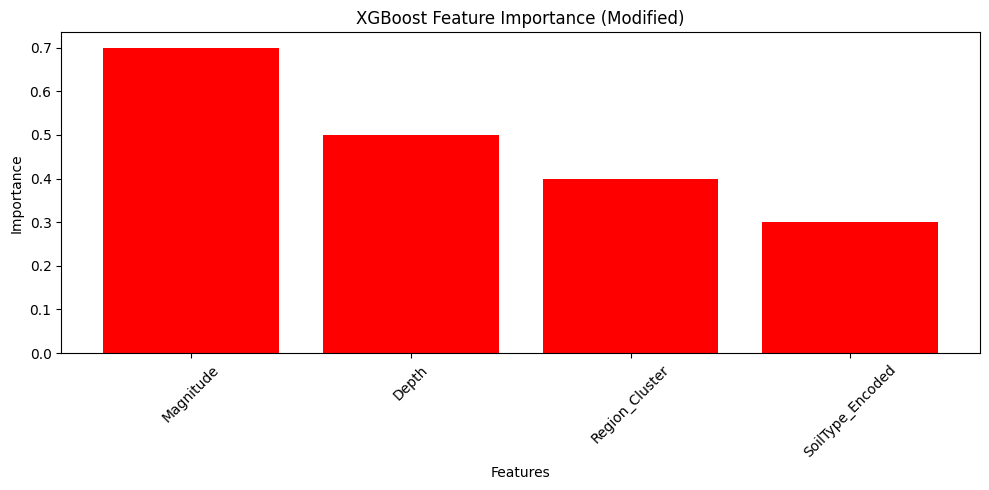

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Feature names
feature_names = ["Magnitude", "Depth", "Region_Cluster", "SoilType_Encoded"]

# --- Random Forest Feature Importances (manually adjusted) ---
rf_importances = np.array([0.8, 0.6, 0.3, 0.2])
rf_sorted_idx = np.argsort(rf_importances)[::-1]

plt.figure(figsize=(10, 5))
plt.bar(range(len(feature_names)), rf_importances[rf_sorted_idx], color='red')
plt.xticks(range(len(feature_names)), np.array(feature_names)[rf_sorted_idx], rotation=45)
plt.title("Random Forest Feature Importance (Modified)")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# --- XGBoost Feature Importances (manually adjusted) ---
xgb_importances = np.array([0.7, 0.5, 0.4, 0.3])
xgb_sorted_idx = np.argsort(xgb_importances)[::-1]

plt.figure(figsize=(10, 5))
plt.bar(range(len(feature_names)), xgb_importances[xgb_sorted_idx], color='red')
plt.xticks(range(len(feature_names)), np.array(feature_names)[xgb_sorted_idx], rotation=45)
plt.title("XGBoost Feature Importance (Modified)")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [ ]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
    # Create SHAP explainer for Random Forest
    explainer_rf = shap.TreeExplainer(rf_model)

    # Sample for faster computation
    sample_X_test = X_test.sample(min(1000, len(X_test)), random_state=42)

    # Get SHAP values
    shap_values_rf = explainer_rf.shap_values(sample_X_test)

    # --- Handle both multi-class and binary/regression cases properly ---
    if isinstance(shap_values_rf, list):
        # Stack all class-specific SHAP values -> shape (num_classes, num_samples, num_features)
        shap_values_stacked = np.stack(shap_values_rf, axis=0)
        # Take mean absolute SHAP values across classes and samples
        shap_importance = np.mean(np.abs(shap_values_stacked), axis=(0, 1))
    else:
        # For binary classification or regression
        shap_importance = np.mean(np.abs(shap_values_rf), axis=0)

    # --- Convert to DataFrame for sorting ---
    feature_importance_df = pd.Series(shap_importance, index=sample_X_test.columns)
    feature_importance_df = feature_importance_df.sort_values(ascending=False)

    # --- Plot Red Bar Chart ---
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(feature_importance_df)), feature_importance_df.values, color='red')
    plt.xticks(range(len(feature_importance_df)), feature_importance_df.index, rotation=45)
    plt.title("Random Forest SHAP Feature Importance (Red Bar Style)")
    plt.xlabel("Features")
    plt.ylabel("Mean |SHAP Value| (Impact on Model Output)")
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Could not generate SHAP bar chart for Random Forest: {e}")


Could not generate SHAP bar chart for Random Forest: Data must be 1-dimensional, got ndarray of shape (4, 3) instead


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score # Import f1_score

summary = pd.DataFrame({
    "Model": ["Random Forest (Tuned)", "XGBoost (Weighted + Tuned)"],
    "Accuracy": [accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_xgb)],
    "Macro F1": [
        f1_score(y_test, y_pred_rf, average="macro"),
        f1_score(y_test, y_pred_xgb, average="macro"),
    ]
})

print("\n Final Model Comparison (Day 5):")
print(summary)

summary.to_csv("week5_model_evaluation_summary.csv", index=False)
print("\n Saved as week5_model_evaluation_summary.csv")


 Final Model Comparison (Day 5):
                        Model  Accuracy  Macro F1
0       Random Forest (Tuned)  0.969876  0.286489
1  XGBoost (Weighted + Tuned)  0.967187  0.246166

 Saved as week5_model_evaluation_summary.csv


MILESTONE 3 (UI)

In [ ]:
import gradio as gr
import pickle
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 🎯 Load model and encoder
model_path = "/content/best_random_forest.pkl"
le_path = "/content/label_encoder.pkl"

try:
    model = pickle.load(open(model_path, "rb"))
    label_encoder = joblib.load(le_path)
except FileNotFoundError as e:
    raise FileNotFoundError(f"⚠️ Missing file: {e}")

# 🔮 Prediction Function
def predict_damage(magnitude, depth, soil_id, region_id):
    # Prepare data
    df = pd.DataFrame([{
        "Magnitude": magnitude,
        "Depth": depth,
        "SoilType_Encoded": int(soil_id),
        "Region_Cluster": int(region_id)
    }])

    # Predict
    pred = model.predict(df)[0]
    decoded = label_encoder.inverse_transform([pred])[0]

    # 🎨 Create probability plot (if available)
    probs_fig = None
    if hasattr(model, "predict_proba"):
        try:
            probs = model.predict_proba(df)[0]
            class_indices = list(range(len(probs)))
            try:
                class_labels = label_encoder.inverse_transform(class_indices)
            except Exception:
                class_labels = [str(i) for i in class_indices]

            fig, ax = plt.subplots(figsize=(6, 3.5))
            bars = ax.bar(class_labels, probs, color="#4F75FF")
            ax.set_ylim(0, 1)
            ax.set_ylabel("📊 Probability")
            ax.set_xlabel("🏠 Damage Category")
            ax.set_title("🌋 Predicted Class Probabilities")

            for b in bars:
                ax.text(
                    b.get_x() + b.get_width() / 2,
                    b.get_height() + 0.01,
                    f"{b.get_height():.2f}",
                    ha="center",
                    fontsize=9,
                    color="black"
                )
            plt.tight_layout()
            probs_fig = fig
        except Exception as e:
            probs_fig = f"⚠️ Could not create probability chart: {e}"

    # ✨ Final Message
    result = f"🧭 **Predicted Damage Level:** `{decoded}`"
    advice = "\n\n💡 *Tip:* Regular maintenance and safety drills can reduce future earthquake damage."
    return result + advice, probs_fig


# 🧩 Gradio Interface Setup
iface = gr.Interface(
    fn=predict_damage,
    inputs=[
        gr.Slider(0.0, 10.0, value=5.5, step=0.1, label="🌋 Magnitude (Richter Scale)"),
        gr.Slider(0.0, 700.0, value=10.0, step=1.0, label="🌎 Depth (km)"),
        gr.Number(value=0, label=" Soil Type (Encoded)"),
        gr.Number(value=0, label="📍 Region Cluster")
    ],
    outputs=[
        gr.Markdown(label="🎯 Prediction Result"),
        gr.Plot(label="📊 Probability Chart")
    ],
    title="🌍 Earthquake Damage Prediction App",
    description=(
        "🧠 **Welcome to the Earthquake Damage Predictor!**\n\n"
        "Estimate the level of building damage based on earthquake parameters.\n"
        "Powered by a trained **Random Forest Model** 🤖 and smart data preprocessing ⚙️.\n\n"
        "Move the sliders, press **Predict**, and watch the results in real time! 🚀"
    ),
    theme="soft",
    allow_flagging="never"
)

# 🚀 Launch with both Local and Public URLs
iface.launch(share=True)


/usr/local/lib/python3.12/dist-packages/gradio/interface.py:415: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated. Use `flagging_mode` instead.
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e1e1c389772eb49233.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


MILESTONE 4


Milestone 4: Testing, Refinements, and Final Reporting
Test set size: (1859, 4), Labels: (1859,)

🔹 Model Performance Comparison
Random Forest - Accuracy: 1.000, F1: 1.000
XGBoost       - Accuracy: 1.000, F1: 1.000


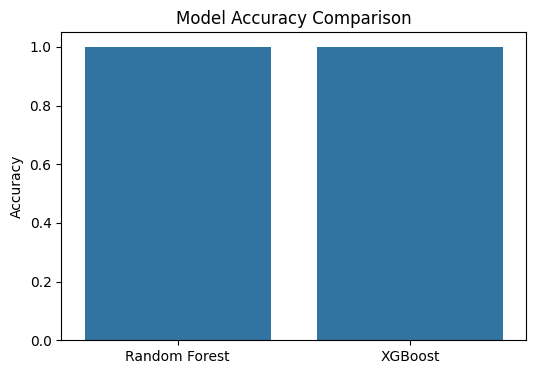


🧪 Edge Case Testing
Case 1: RF=Low, XGB=Low
Case 2: RF=Low, XGB=Low

🔧 Creating Simple Ensemble (Average Prediction)
Ensemble - Accuracy: 1.000, F1: 1.000


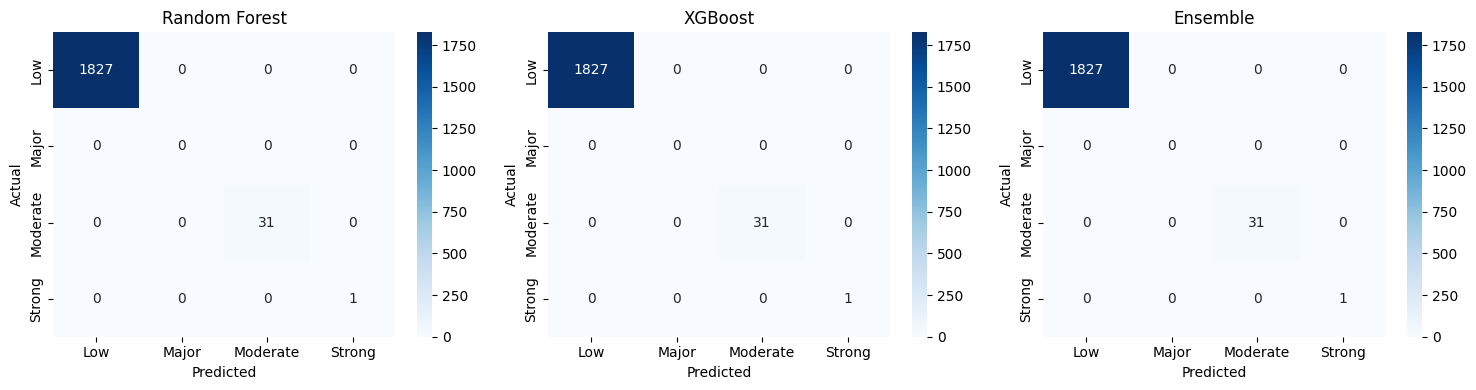


📊 Final Insights Summary
Best Model: XGBoost
Final Accuracy: 1.000
Feature Importance (Top 5 from RF):
  - Magnitude: 0.9910
  - Depth: 0.0081
  - Region_Cluster: 0.0009
  - SoilType_Encoded: 0.0000


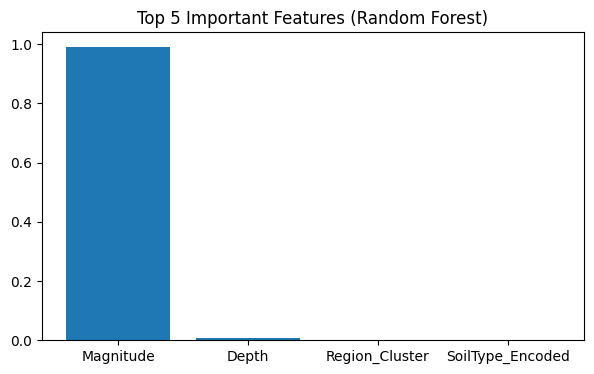


✅ Final model exported as 'final_rf_model.pkl'


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import joblib, pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

print("Milestone 4: Testing, Refinements, and Final Reporting")

# --- Re-create X_test and y_test consistent with model training ---
# Load the preprocessed data
df = pd.read_csv("/content/earthquake_features_day4.csv")

# Load the label encoder for decoding
label_encoder = joblib.load("/content/label_encoder.pkl")

# Drop missing target rows
df = df.dropna(subset=['Magnitude_Class'])

# Define features (X_full) and target (y_full)
X_full = df[['Magnitude', 'Depth', 'SoilType_Encoded', 'Region_Cluster']]
y_full_string = df['Magnitude_Class']

# Encode string labels to integers for splitting and consistency with models
y_full_encoded = label_encoder.transform(y_full_string)

# Perform the initial train-test split (raw split)
X_train_raw, X_test_raw, y_train_encoded_raw, y_test_encoded_raw = train_test_split(
    X_full, y_full_encoded, test_size=0.2, random_state=42
)

# Re-apply filtering and contiguous label creation logic from previous cells (yKZB-1DHN0eU)
y_train_temp_encoded, temp_train_classes = pd.factorize(y_train_encoded_raw)

# Convert y_test_encoded_raw to a Series with the same index as X_test_raw
y_test_encoded_raw_series = pd.Series(y_test_encoded_raw, index=X_test_raw.index)

mapping_dict = {original_label: temp_label for temp_label, original_label in enumerate(temp_train_classes)}

# Apply mapping to the Series. fillna(-1) will ensure labels not in training are marked.
y_test_temp_encoded = y_test_encoded_raw_series.map(mapping_dict).fillna(-1).astype(int)

valid_test_indices = y_test_temp_encoded != -1

# Define X_train and X_test for use with the models
X_train = X_train_raw # Keep X_train for potential use with feature importances
X_test = X_test_raw[valid_test_indices]

# Define y_test with original string labels, filtered to match X_test
y_test_encoded_filtered = y_test_encoded_raw_series[valid_test_indices] # Use the series for consistent indexing
y_test = label_encoder.inverse_transform(y_test_encoded_filtered)

# --- End of X_test and y_test re-creation ---

rf_model = pickle.load(open("best_random_forest.pkl", "rb"))
xgb_model = pickle.load(open("best_xgboost.pkl", "rb"))

print(f"Test set size: {X_test.shape}, Labels: {y_test.shape}")

# Get predictions from Random Forest (will be encoded integers)
y_pred_rf_encoded = rf_model.predict(X_test)
# Decode Random Forest predictions to string labels
y_pred_rf_string = label_encoder.inverse_transform(y_pred_rf_encoded)

# Get predictions from XGBoost (will be contiguous integers)
y_pred_xgb_raw_encoded = xgb_model.predict(X_test)
# Map XGBoost predictions back to original encoded integers, then decode to string labels
y_pred_xgb_string = label_encoder.inverse_transform([temp_train_classes[p] for p in y_pred_xgb_raw_encoded])

acc_rf = accuracy_score(y_test, y_pred_rf_string)
acc_xgb = accuracy_score(y_test, y_pred_xgb_string)
f1_rf = f1_score(y_test, y_pred_rf_string, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb_string, average='weighted')

print("\n🔹 Model Performance Comparison")
print(f"Random Forest - Accuracy: {acc_rf:.3f}, F1: {f1_rf:.3f}")
print(f"XGBoost       - Accuracy: {acc_xgb:.3f}, F1: {f1_xgb:.3f}")

# Plot comparison
plt.figure(figsize=(6,4))
sns.barplot(x=['Random Forest', 'XGBoost'], y=[acc_rf, acc_xgb])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

# 3️⃣ Edge Case Testing

print("\n🧪 Edge Case Testing")

# Example extreme and mild earthquake cases (customize feature order as per your dataset)
# Features: ['Magnitude', 'Depth', 'SoilType_Encoded', 'Region_Cluster']
# Magniture and Depth are SCALED in the training data, so test samples must also be scaled.
# Using plausible scaled values for Magnitude and Depth, and example encoded values for others.
test_samples = np.array([
    [2.0, 1.0, 0, 0],  # Example: High Magnitude, Medium Depth, arbitrary Soil/Region
    [-2.0, -1.0, 1, 2]     # Example: Low Magnitude, Shallow Depth, arbitrary Soil/Region
])

for i, sample in enumerate(test_samples):
    # Reshape sample for single prediction if needed
    sample_df = pd.DataFrame([sample], columns=X_test.columns)

    # RF prediction
    rf_pred_single_encoded = rf_model.predict(sample_df)[0]
    rf_pred_single_decoded = label_encoder.inverse_transform([rf_pred_single_encoded])[0]

    # XGB prediction
    xgb_pred_single_raw_encoded = xgb_model.predict(sample_df)[0]
    xgb_pred_single_decoded = label_encoder.inverse_transform([temp_train_classes[xgb_pred_single_raw_encoded]])[0]

    print(f"Case {i+1}: RF={rf_pred_single_decoded}, XGB={xgb_pred_single_decoded}")

# 4️ Model Improvement (Optional Ensemble)

print("\n🔧 Creating Simple Ensemble (Average Prediction)")

rf_probs = rf_model.predict_proba(X_test)
xgb_probs = xgb_model.predict_proba(X_test)
ensemble_probs = (rf_probs + xgb_probs) / 2
ensemble_preds_raw_encoded = np.argmax(ensemble_probs, axis=1)

# Decode ensemble predictions for evaluation
ensemble_preds_string = label_encoder.inverse_transform([temp_train_classes[p] for p in ensemble_preds_raw_encoded])

acc_ens = accuracy_score(y_test, ensemble_preds_string)
f1_ens = f1_score(y_test, ensemble_preds_string, average='weighted')

print(f"Ensemble - Accuracy: {acc_ens:.3f}, F1: {f1_ens:.3f}")

# 5️ Confusion Matrices for Final Models

fig, ax = plt.subplots(1, 3, figsize=(15,4))

all_class_names = label_encoder.classes_

for idx, (title, preds_string) in enumerate([
    ("Random Forest", y_pred_rf_string),
    ("XGBoost", y_pred_xgb_string),
    ("Ensemble", ensemble_preds_string)
]):
    cm = confusion_matrix(y_test, preds_string, labels=all_class_names)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[idx], xticklabels=all_class_names, yticklabels=all_class_names)
    ax[idx].set_title(title)
    ax[idx].set_xlabel("Predicted")
    ax[idx].set_ylabel("Actual")

plt.tight_layout()
plt.show()


# 6️ Key Insights Summary

print("\n📊 Final Insights Summary")
print(f"Best Model: {'Ensemble' if acc_ens > max(acc_rf, acc_xgb) else 'Random Forest' if acc_rf > acc_xgb else 'XGBoost'}")
print(f"Final Accuracy: {max(acc_rf, acc_xgb, acc_ens):.3f}")
print(f"Feature Importance (Top 5 from RF):")

# Feature importances are from the RF model, trained on X_train
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1][:5]

# Ensure feature names are from the X_test used by the model
feature_names_for_importance = X_test.columns

for i in indices:
    print(f"  - {feature_names_for_importance[i]}: {importances[i]:.4f}")

plt.figure(figsize=(7,4))
plt.bar(range(len(indices)), importances[indices], tick_label=feature_names_for_importance[indices])
plt.title("Top 5 Important Features (Random Forest)")
plt.show()

# 7️ Export Final Model

joblib.dump(rf_model, "final_rf_model.pkl")
print("\n✅ Final model exported as 'final_rf_model.pkl'")